# 🏡 House Price Prediction – Ames, Iowa
### 📘 Kaggle: Advanced Regression Techniques

## 1️⃣ Business Problem
A homebuyer wants to estimate the price of their dream house but does not know how each feature influences its value.  
In this project, we aim to understand the factors affecting house prices and build a predictive model capable of estimating a home's sale price accurately.

---

## 2️⃣ Dataset Story
This project uses the Kaggle competition dataset **"House Prices: Advanced Regression Techniques."**

- 📊 Train Set: 1,460 houses  
- 📊 Test Set: 1,459 houses  
- 🧩 Features: 79 variables describing structural, locational, and quality attributes  
- 🎯 Target: `SalePrice`

The dataset includes:  
- Lot size and shape  
- House quality and overall condition  
- Living areas (basement, first floor, second floor)  
- Garage features  
- Year built and remodeled  
- Neighborhood characteristics  
- External materials and more

---




# 🔧 1. Import Required Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler



warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [102]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 📥 2. Loading the Dataset

In [103]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

df = pd.concat([train, test], ignore_index=True)

In [104]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
train.shape 

(1460, 81)

In [106]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [107]:
test.shape

(1459, 80)

# 🔍 3. Exploratory Data Analysis (EDA)


In [108]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(2919, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object
##################### Head #####################
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub

# 🔢 4. Classifying Variables: Numerical vs Categorical

In [109]:
def grab_col_names(dataframe , cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") 
    print(f"Variables: {dataframe.shape[1]}") 
    print(f'cat_cols: {len(cat_cols)}') 
    print(f'num_cols: {len(num_cols)}') 
    print(f'cat_but_car: {len(cat_but_car)}') 
    print(f'num_but_cat: {len(num_but_cat)}') 


    return cat_cols, num_cols, cat_but_car, num_but_cat

cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 28
cat_but_car: 1
num_but_cat: 10


In [110]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'YrSold']

In [111]:
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [112]:
cat_but_car

['Neighborhood']

In [113]:
num_but_cat

['OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'YrSold']

# 🔠 5. Analysis of Categorical Variables

          MSZoning  Ratio
MSZoning                 
RL            2265 77.595
RM             460 15.759
FV             139  4.762
RH              26  0.891
C (all)         25  0.856
##########################################


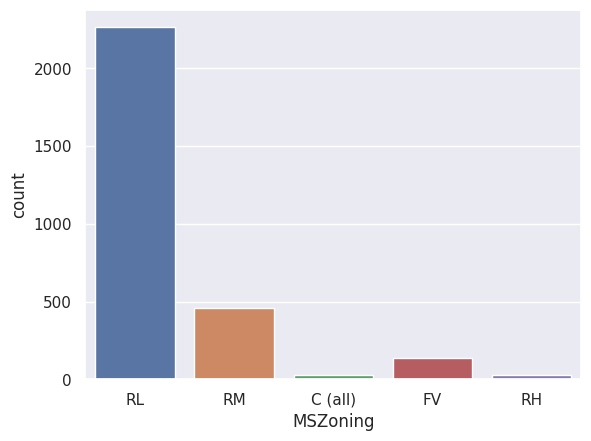

        Street  Ratio
Street               
Pave      2907 99.589
Grvl        12  0.411
##########################################


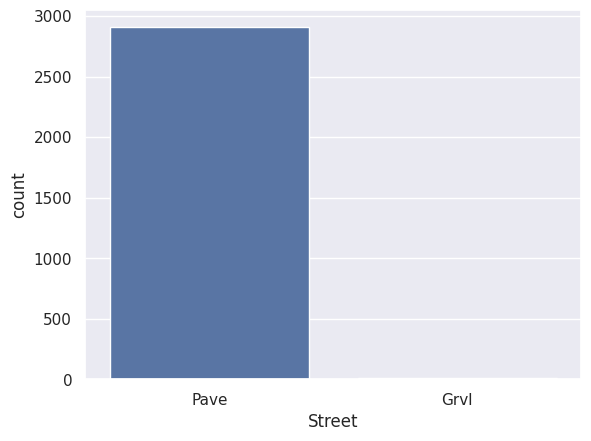

       Alley  Ratio
Alley              
Grvl     120  4.111
Pave      78  2.672
##########################################


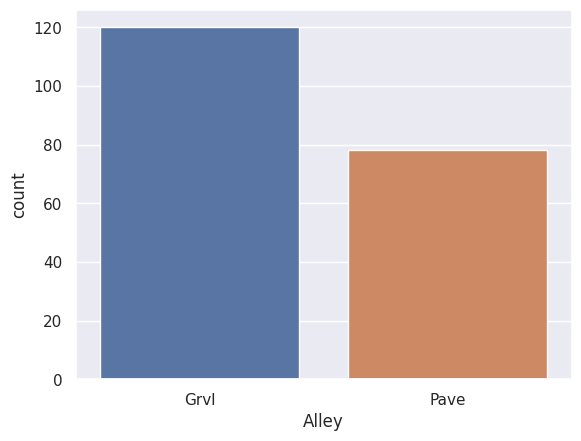

          LotShape  Ratio
LotShape                 
Reg           1859 63.686
IR1            968 33.162
IR2             76  2.604
IR3             16  0.548
##########################################


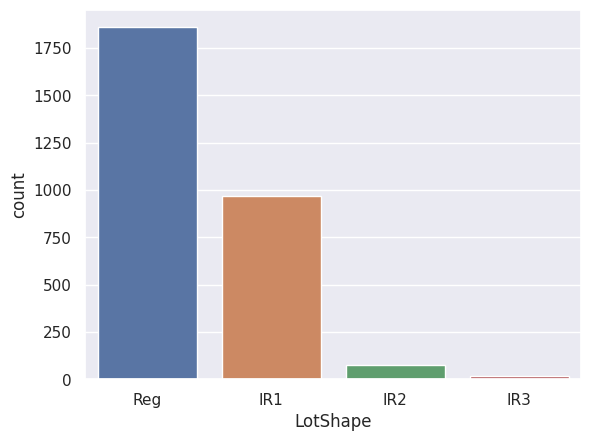

             LandContour  Ratio
LandContour                    
Lvl                 2622 89.825
HLS                  120  4.111
Bnk                  117  4.008
Low                   60  2.055
##########################################


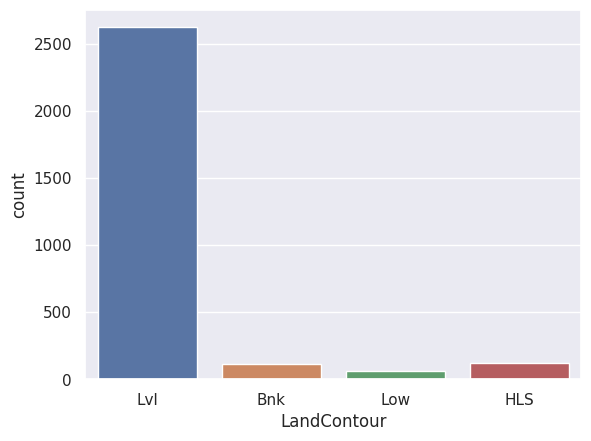

           Utilities  Ratio
Utilities                  
AllPub          2916 99.897
NoSeWa             1  0.034
##########################################


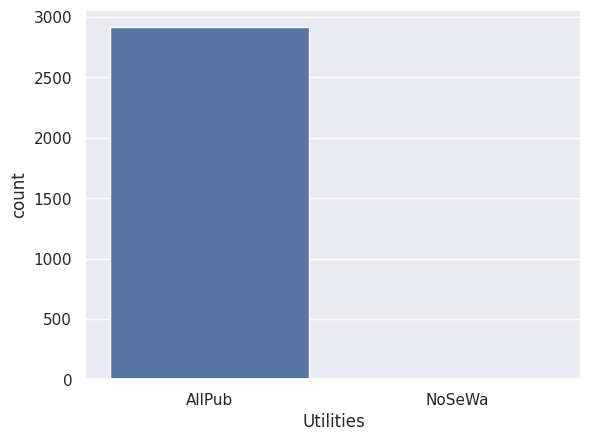

           LotConfig  Ratio
LotConfig                  
Inside          2133 73.073
Corner           511 17.506
CulDSac          176  6.029
FR2               85  2.912
FR3               14  0.480
##########################################


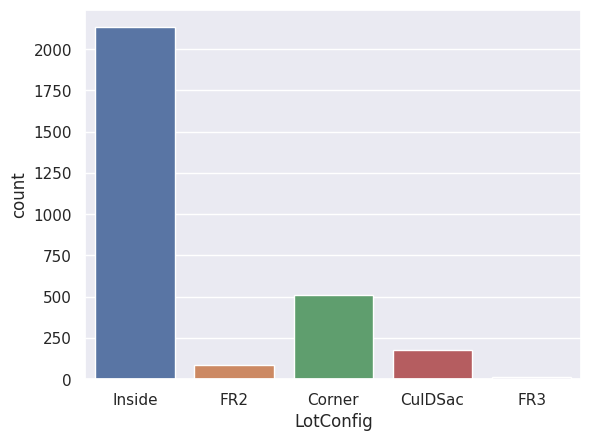

           LandSlope  Ratio
LandSlope                  
Gtl             2778 95.170
Mod              125  4.282
Sev               16  0.548
##########################################


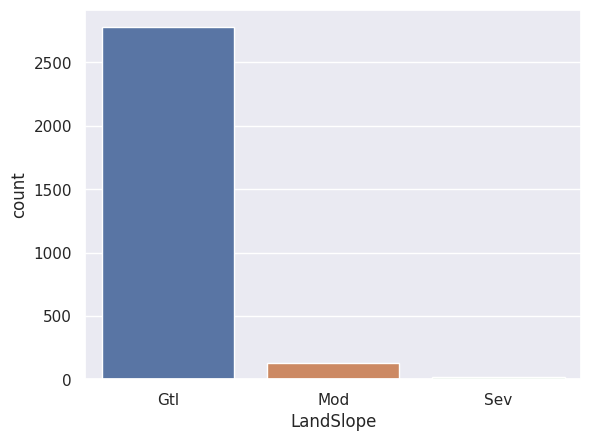

            Condition1  Ratio
Condition1                   
Norm              2511 86.023
Feedr              164  5.618
Artery              92  3.152
RRAn                50  1.713
PosN                39  1.336
RRAe                28  0.959
PosA                20  0.685
RRNn                 9  0.308
RRNe                 6  0.206
##########################################


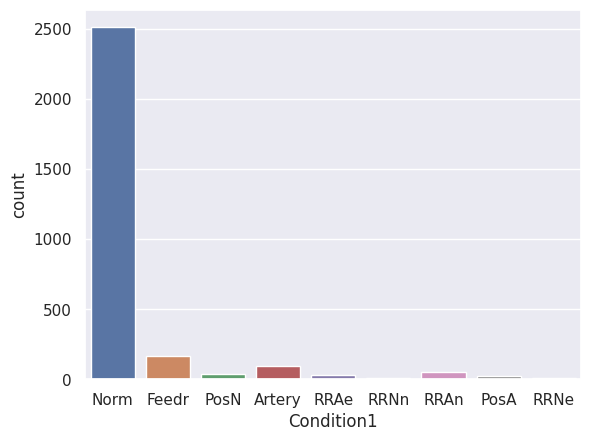

            Condition2  Ratio
Condition2                   
Norm              2889 98.972
Feedr               13  0.445
Artery               5  0.171
PosN                 4  0.137
PosA                 4  0.137
RRNn                 2  0.069
RRAn                 1  0.034
RRAe                 1  0.034
##########################################


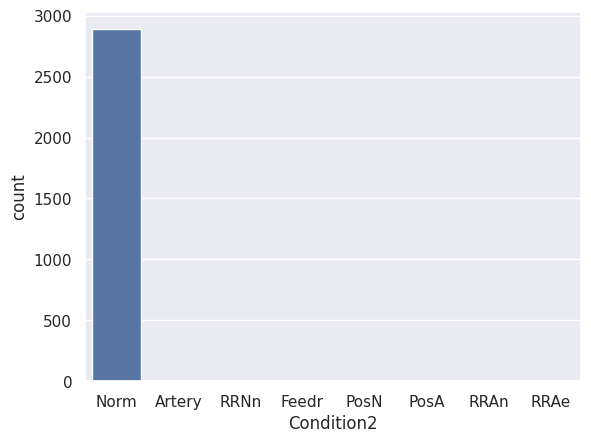

          BldgType  Ratio
BldgType                 
1Fam          2425 83.076
TwnhsE         227  7.777
Duplex         109  3.734
Twnhs           96  3.289
2fmCon          62  2.124
##########################################


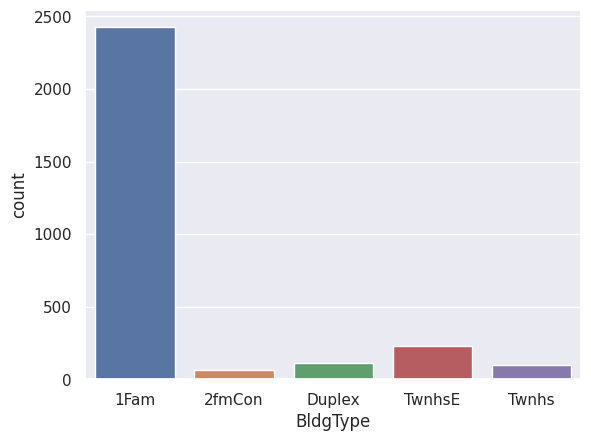

            HouseStyle  Ratio
HouseStyle                   
1Story            1471 50.394
2Story             872 29.873
1.5Fin             314 10.757
SLvl               128  4.385
SFoyer              83  2.843
2.5Unf              24  0.822
1.5Unf              19  0.651
2.5Fin               8  0.274
##########################################


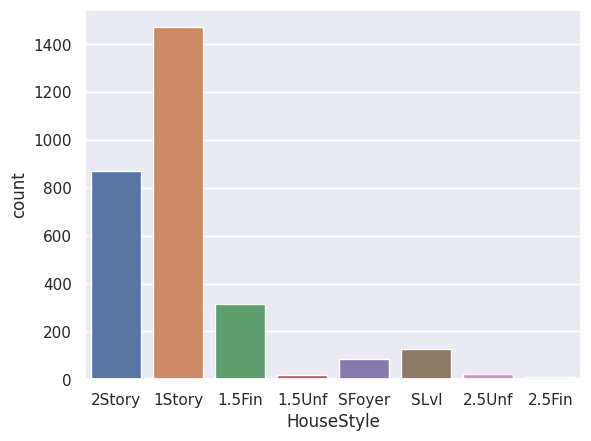

           RoofStyle  Ratio
RoofStyle                  
Gable           2310 79.137
Hip              551 18.876
Gambrel           22  0.754
Flat              20  0.685
Mansard           11  0.377
Shed               5  0.171
##########################################


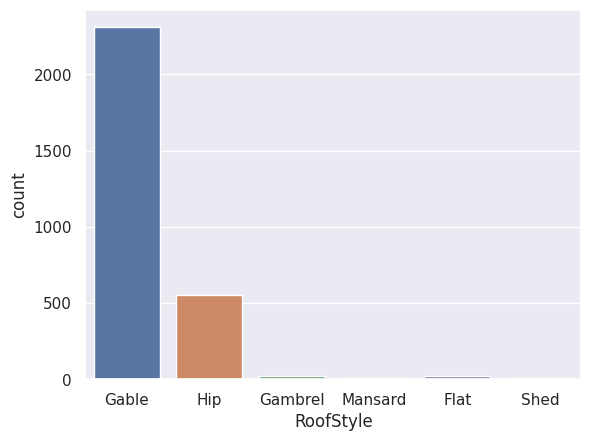

          RoofMatl  Ratio
RoofMatl                 
CompShg       2876 98.527
Tar&Grv         23  0.788
WdShake          9  0.308
WdShngl          7  0.240
Metal            1  0.034
Membran          1  0.034
Roll             1  0.034
ClyTile          1  0.034
##########################################


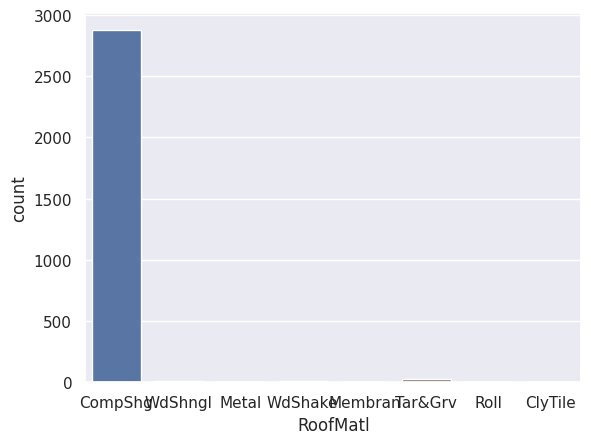

             Exterior1st  Ratio
Exterior1st                    
VinylSd             1025 35.115
MetalSd              450 15.416
HdBoard              442 15.142
Wd Sdng              411 14.080
Plywood              221  7.571
CemntBd              126  4.317
BrkFace               87  2.980
WdShing               56  1.918
AsbShng               44  1.507
Stucco                43  1.473
BrkComm                6  0.206
AsphShn                2  0.069
Stone                  2  0.069
CBlock                 2  0.069
ImStucc                1  0.034
##########################################


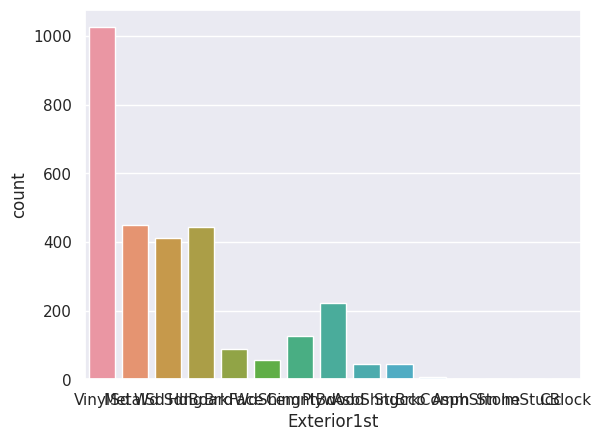

             Exterior2nd  Ratio
Exterior2nd                    
VinylSd             1014 34.738
MetalSd              447 15.313
HdBoard              406 13.909
Wd Sdng              391 13.395
Plywood              270  9.250
CmentBd              126  4.317
Wd Shng               81  2.775
BrkFace               47  1.610
Stucco                47  1.610
AsbShng               38  1.302
Brk Cmn               22  0.754
ImStucc               15  0.514
Stone                  6  0.206
AsphShn                4  0.137
CBlock                 3  0.103
Other                  1  0.034
##########################################


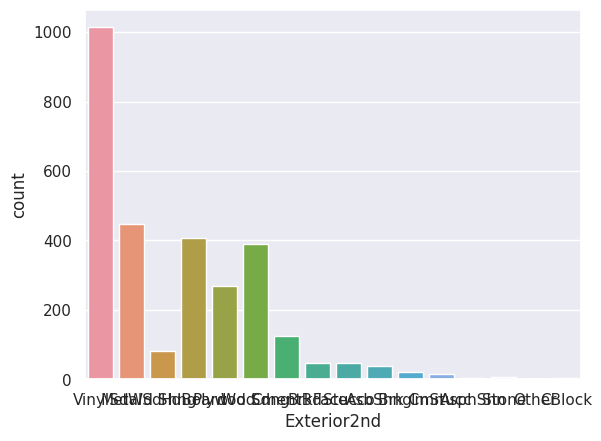

            MasVnrType  Ratio
MasVnrType                   
BrkFace            879 30.113
Stone              249  8.530
BrkCmn              25  0.856
##########################################


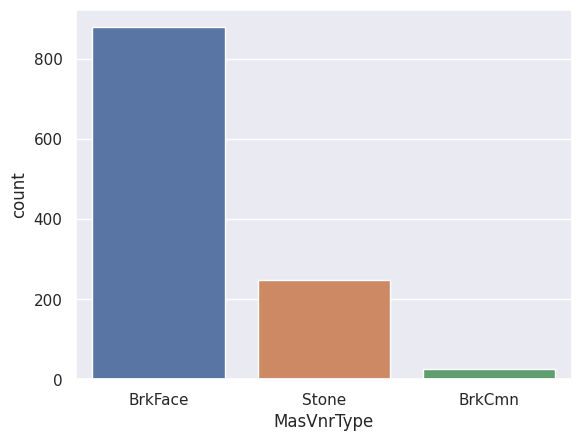

           ExterQual  Ratio
ExterQual                  
TA              1798 61.596
Gd               979 33.539
Ex               107  3.666
Fa                35  1.199
##########################################


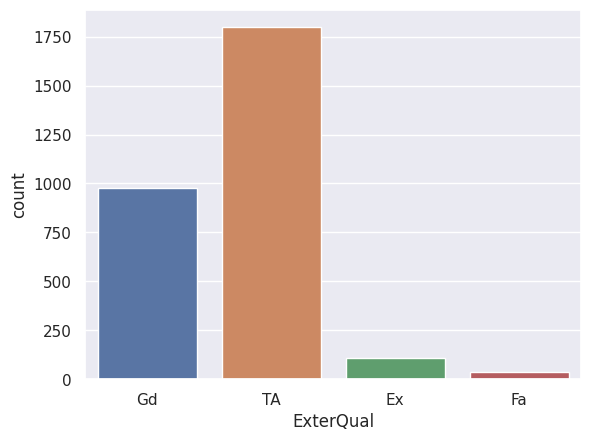

           ExterCond  Ratio
ExterCond                  
TA              2538 86.948
Gd               299 10.243
Fa                67  2.295
Ex                12  0.411
Po                 3  0.103
##########################################


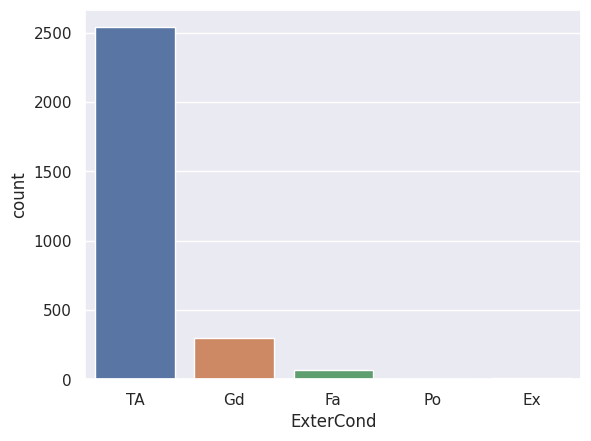

            Foundation  Ratio
Foundation                   
PConc             1308 44.810
CBlock            1235 42.309
BrkTil             311 10.654
Slab                49  1.679
Stone               11  0.377
Wood                 5  0.171
##########################################


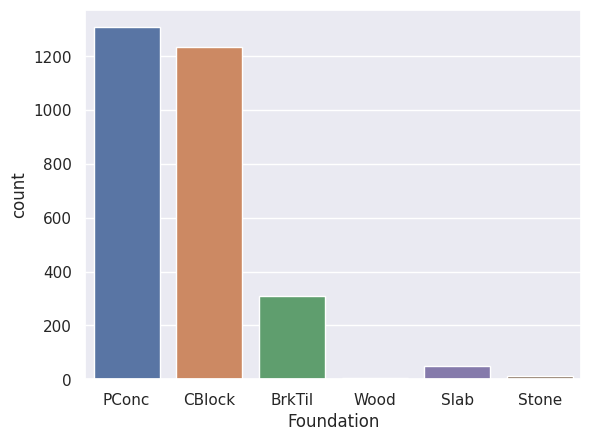

          BsmtQual  Ratio
BsmtQual                 
TA            1283 43.953
Gd            1209 41.418
Ex             258  8.839
Fa              88  3.015
##########################################


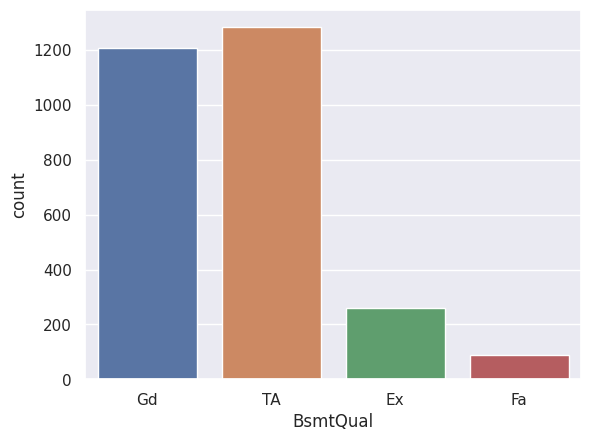

          BsmtCond  Ratio
BsmtCond                 
TA            2606 89.277
Gd             122  4.180
Fa             104  3.563
Po               5  0.171
##########################################


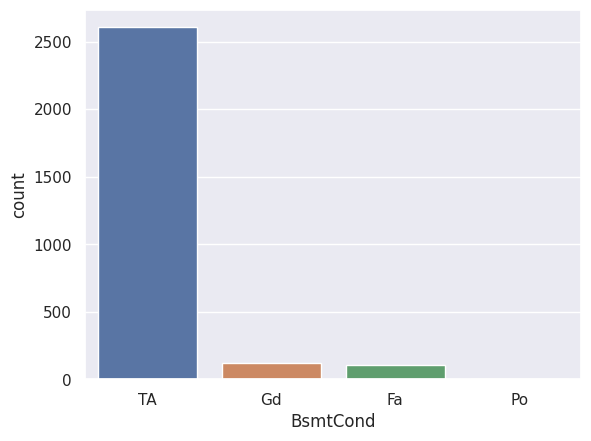

              BsmtExposure  Ratio
BsmtExposure                     
No                    1904 65.228
Av                     418 14.320
Gd                     276  9.455
Mn                     239  8.188
##########################################


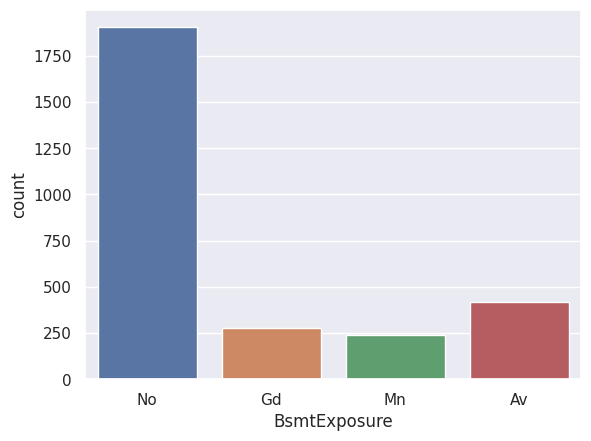

              BsmtFinType1  Ratio
BsmtFinType1                     
Unf                    851 29.154
GLQ                    849 29.085
ALQ                    429 14.697
Rec                    288  9.866
BLQ                    269  9.215
LwQ                    154  5.276
##########################################


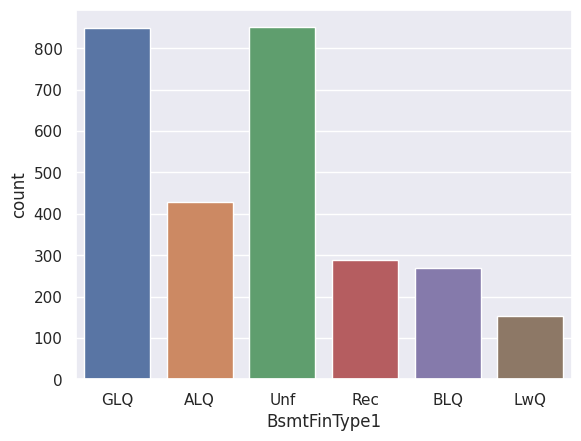

              BsmtFinType2  Ratio
BsmtFinType2                     
Unf                   2493 85.406
Rec                    105  3.597
LwQ                     87  2.980
BLQ                     68  2.330
ALQ                     52  1.781
GLQ                     34  1.165
##########################################


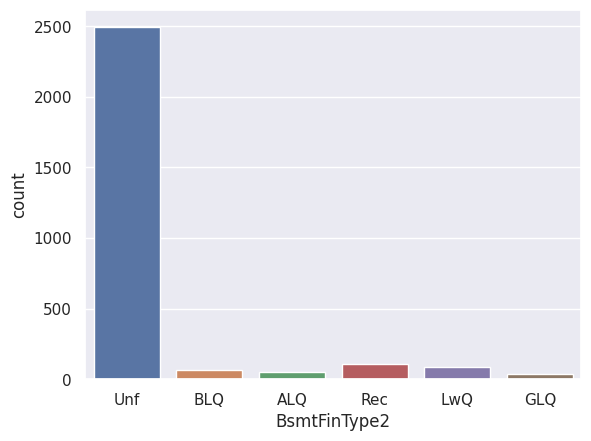

         Heating  Ratio
Heating                
GasA        2874 98.458
GasW          27  0.925
Grav           9  0.308
Wall           6  0.206
OthW           2  0.069
Floor          1  0.034
##########################################


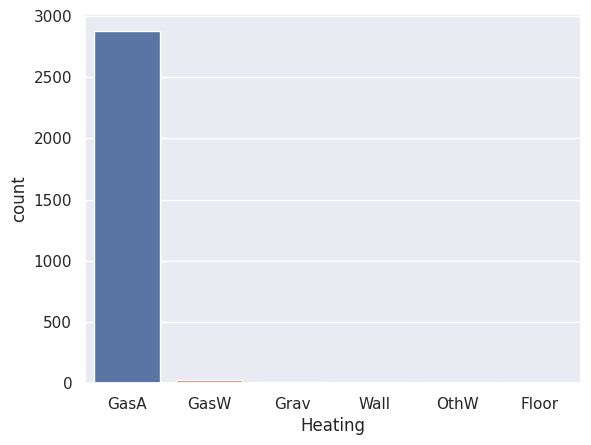

           HeatingQC  Ratio
HeatingQC                  
Ex              1493 51.148
TA               857 29.359
Gd               474 16.238
Fa                92  3.152
Po                 3  0.103
##########################################


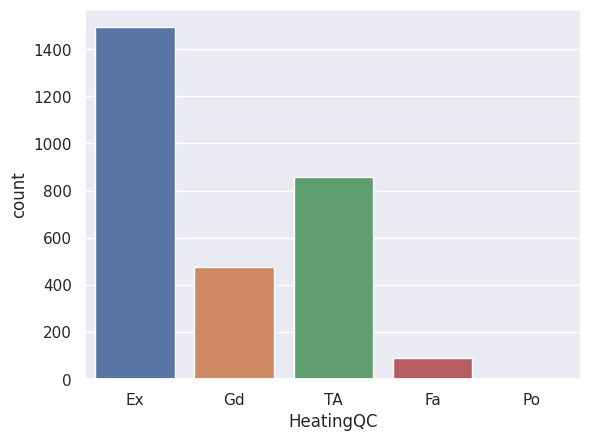

            CentralAir  Ratio
CentralAir                   
Y                 2723 93.285
N                  196  6.715
##########################################


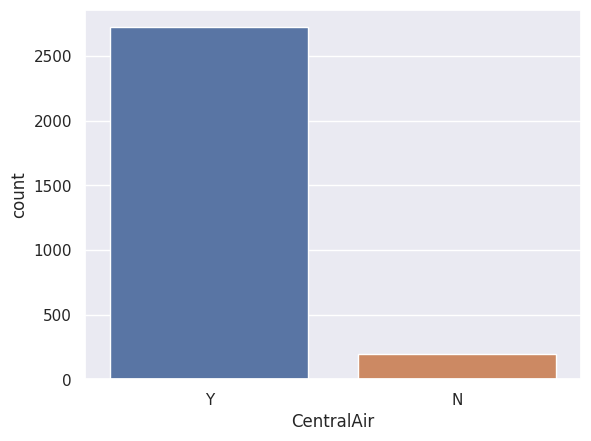

            Electrical  Ratio
Electrical                   
SBrkr             2671 91.504
FuseA              188  6.441
FuseF               50  1.713
FuseP                8  0.274
Mix                  1  0.034
##########################################


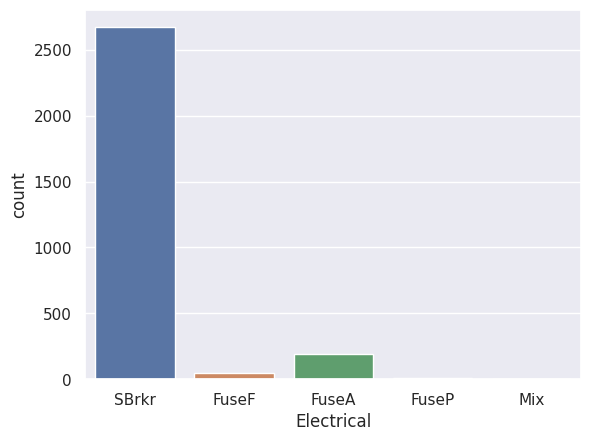

             KitchenQual  Ratio
KitchenQual                    
TA                  1492 51.113
Gd                  1151 39.431
Ex                   205  7.023
Fa                    70  2.398
##########################################


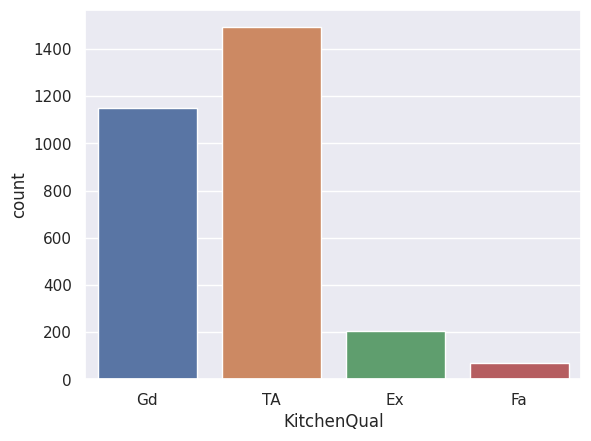

            Functional  Ratio
Functional                   
Typ               2717 93.080
Min2                70  2.398
Min1                65  2.227
Mod                 35  1.199
Maj1                19  0.651
Maj2                 9  0.308
Sev                  2  0.069
##########################################


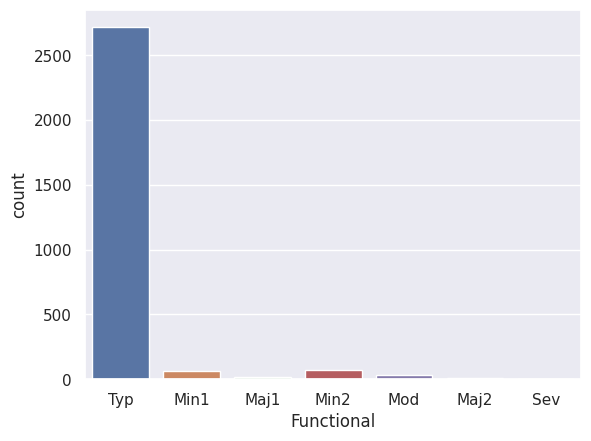

             FireplaceQu  Ratio
FireplaceQu                    
Gd                   744 25.488
TA                   592 20.281
Fa                    74  2.535
Po                    46  1.576
Ex                    43  1.473
##########################################


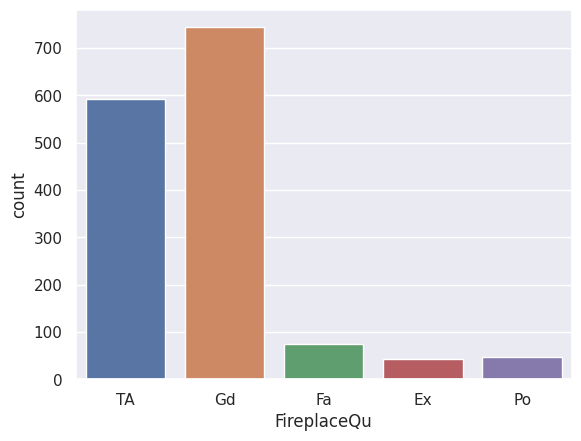

            GarageType  Ratio
GarageType                   
Attchd            1723 59.027
Detchd             779 26.687
BuiltIn            186  6.372
Basment             36  1.233
2Types              23  0.788
CarPort             15  0.514
##########################################


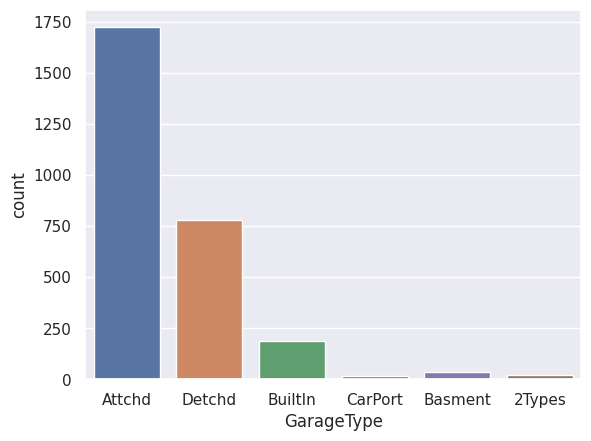

              GarageFinish  Ratio
GarageFinish                     
Unf                   1230 42.138
RFn                    811 27.783
Fin                    719 24.632
##########################################


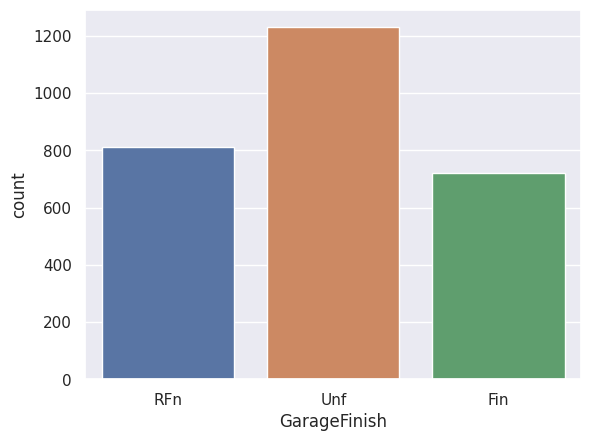

            GarageQual  Ratio
GarageQual                   
TA                2604 89.209
Fa                 124  4.248
Gd                  24  0.822
Po                   5  0.171
Ex                   3  0.103
##########################################


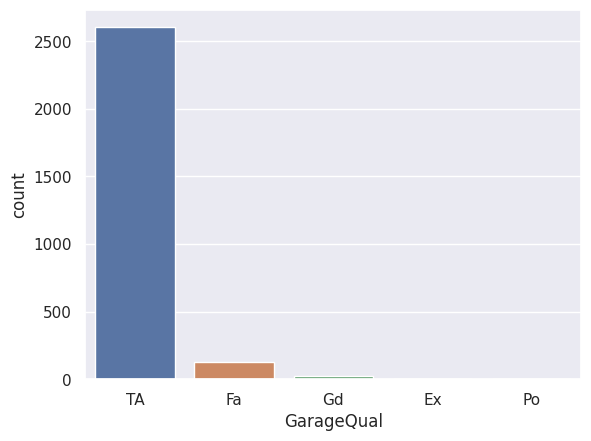

            GarageCond  Ratio
GarageCond                   
TA                2654 90.922
Fa                  74  2.535
Gd                  15  0.514
Po                  14  0.480
Ex                   3  0.103
##########################################


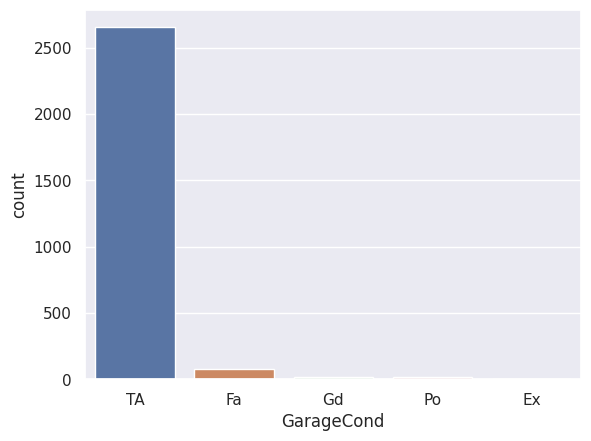

            PavedDrive  Ratio
PavedDrive                   
Y                 2641 90.476
N                  216  7.400
P                   62  2.124
##########################################


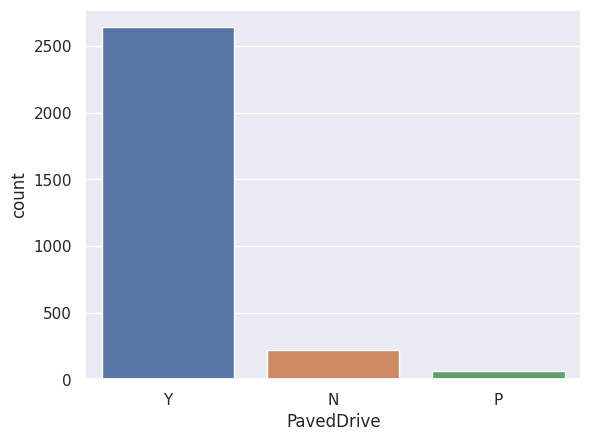

        PoolQC  Ratio
PoolQC               
Ex           4  0.137
Gd           4  0.137
Fa           2  0.069
##########################################


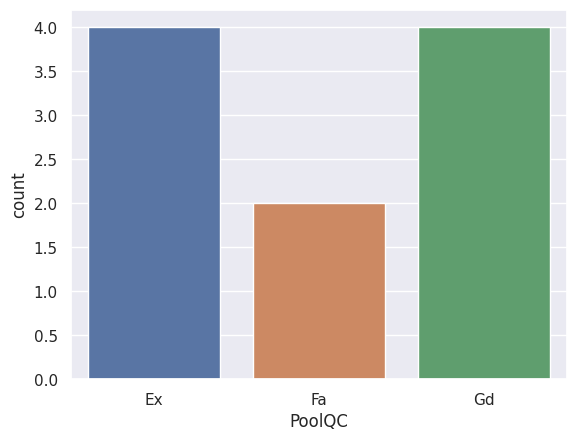

       Fence  Ratio
Fence              
MnPrv    329 11.271
GdPrv    118  4.042
GdWo     112  3.837
MnWw      12  0.411
##########################################


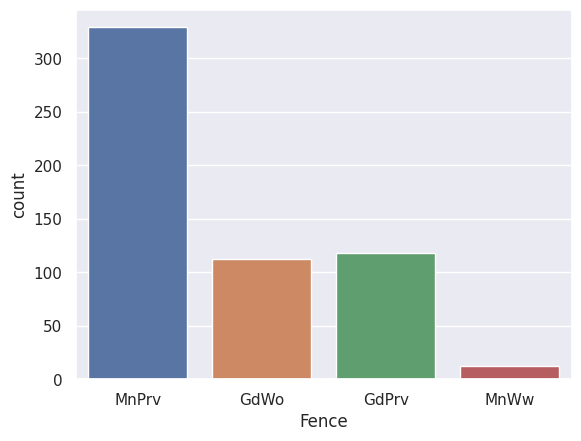

             MiscFeature  Ratio
MiscFeature                    
Shed                  95  3.255
Gar2                   5  0.171
Othr                   4  0.137
TenC                   1  0.034
##########################################


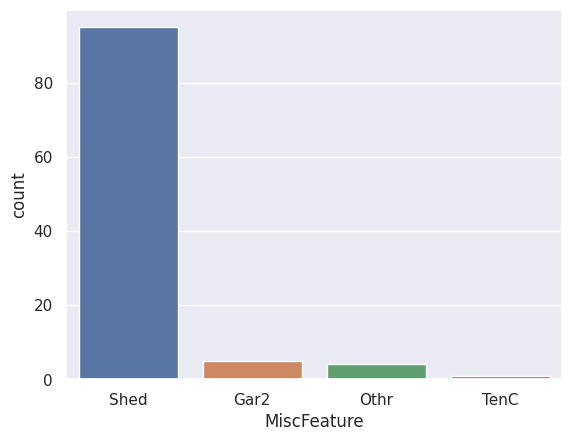

          SaleType  Ratio
SaleType                 
WD            2525 86.502
New            239  8.188
COD             87  2.980
ConLD           26  0.891
CWD             12  0.411
ConLI            9  0.308
ConLw            8  0.274
Oth              7  0.240
Con              5  0.171
##########################################


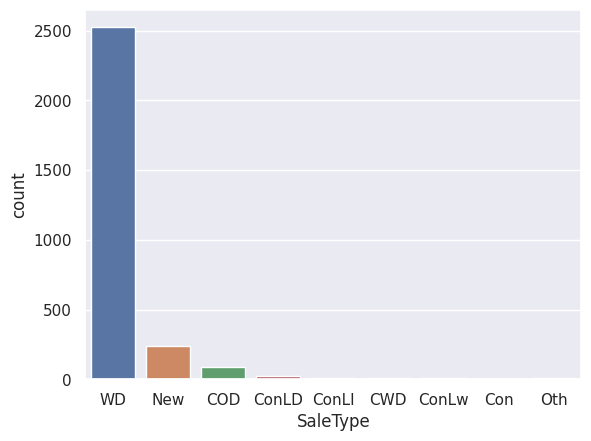

               SaleCondition  Ratio
SaleCondition                      
Normal                  2402 82.288
Partial                  245  8.393
Abnorml                  190  6.509
Family                    46  1.576
Alloca                    24  0.822
AdjLand                   12  0.411
##########################################


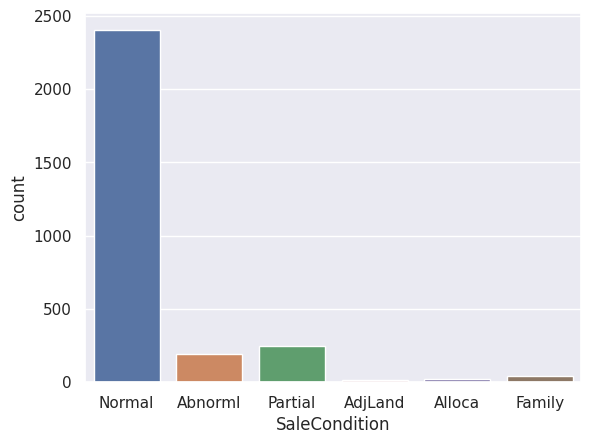

             OverallCond  Ratio
OverallCond                    
5                   1645 56.355
6                    531 18.191
7                    390 13.361
8                    144  4.933
4                    101  3.460
3                     50  1.713
9                     41  1.405
2                     10  0.343
1                      7  0.240
##########################################


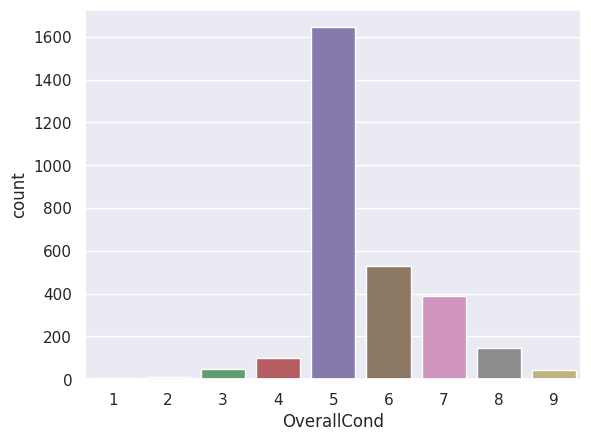

              BsmtFullBath  Ratio
BsmtFullBath                     
0.000                 1705 58.410
1.000                 1172 40.151
2.000                   38  1.302
3.000                    2  0.069
##########################################


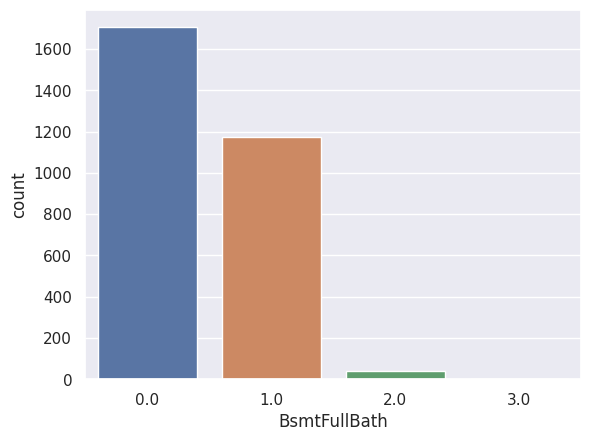

              BsmtHalfBath  Ratio
BsmtHalfBath                     
0.000                 2742 93.936
1.000                  171  5.858
2.000                    4  0.137
##########################################


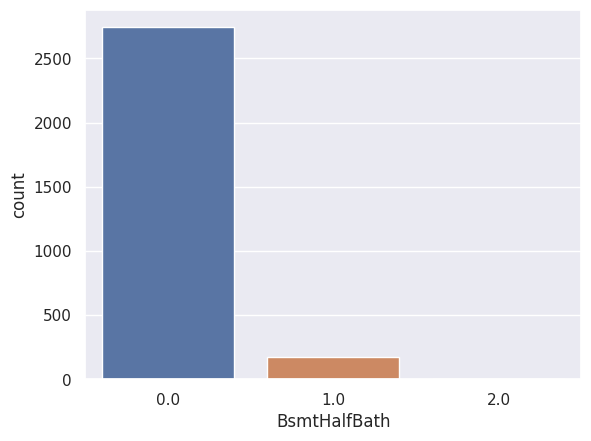

          FullBath  Ratio
FullBath                 
2             1530 52.415
1             1309 44.844
3               64  2.193
0               12  0.411
4                4  0.137
##########################################


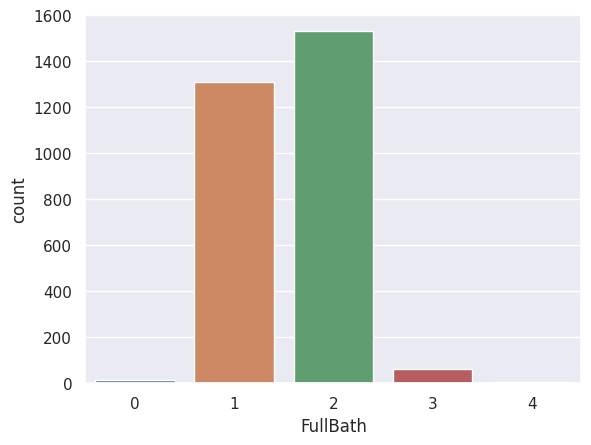

          HalfBath  Ratio
HalfBath                 
0             1834 62.830
1             1060 36.314
2               25  0.856
##########################################


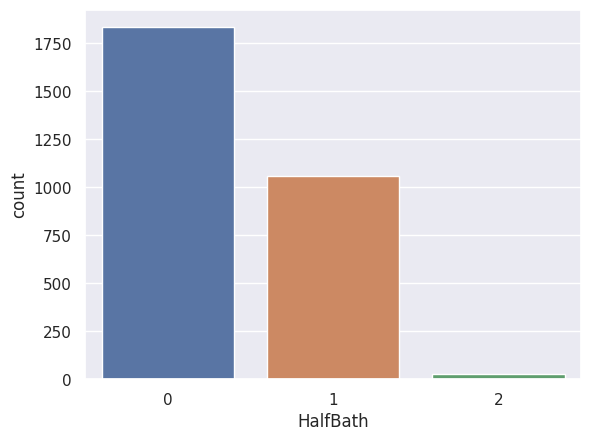

              BedroomAbvGr  Ratio
BedroomAbvGr                     
3                     1596 54.676
2                      742 25.420
4                      400 13.703
1                      103  3.529
5                       48  1.644
6                       21  0.719
0                        8  0.274
8                        1  0.034
##########################################


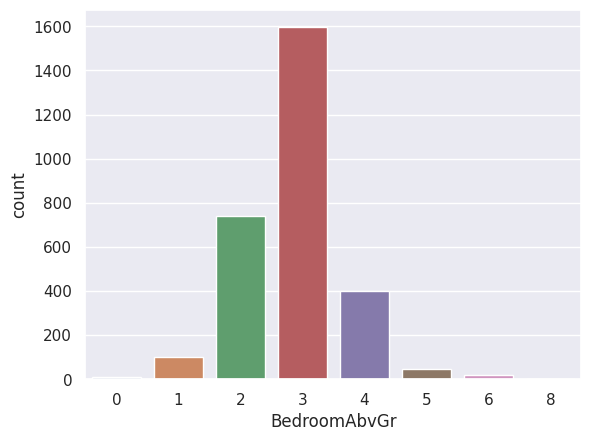

              KitchenAbvGr  Ratio
KitchenAbvGr                     
1                     2785 95.409
2                      129  4.419
0                        3  0.103
3                        2  0.069
##########################################


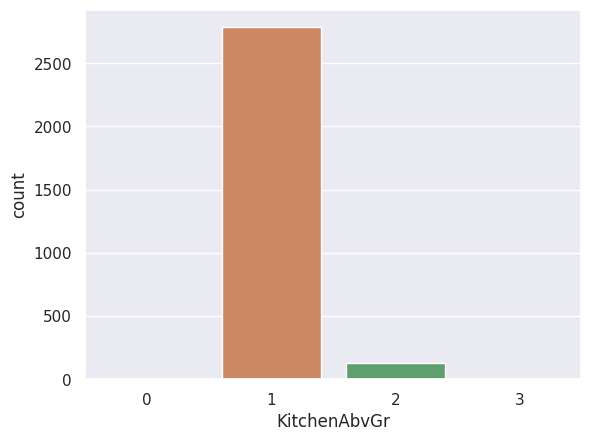

            Fireplaces  Ratio
Fireplaces                   
0                 1420 48.647
1                 1268 43.440
2                  219  7.503
3                   11  0.377
4                    1  0.034
##########################################


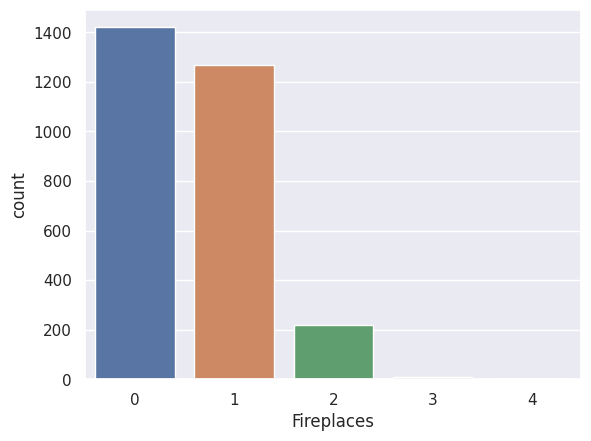

            GarageCars  Ratio
GarageCars                   
2.000             1594 54.608
1.000              776 26.584
3.000              374 12.813
0.000              157  5.379
4.000               16  0.548
5.000                1  0.034
##########################################


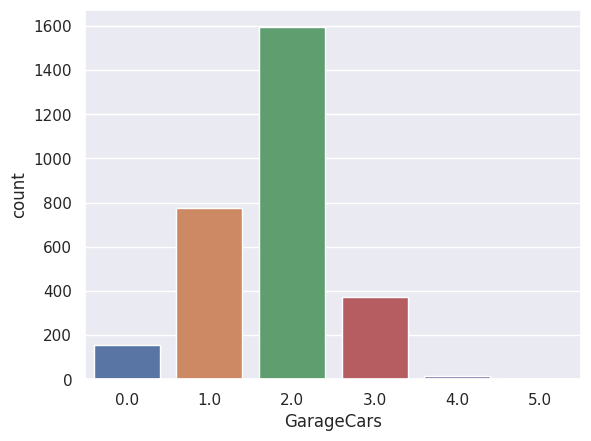

        YrSold  Ratio
YrSold               
2007       692 23.707
2009       647 22.165
2008       622 21.309
2006       619 21.206
2010       339 11.614
##########################################


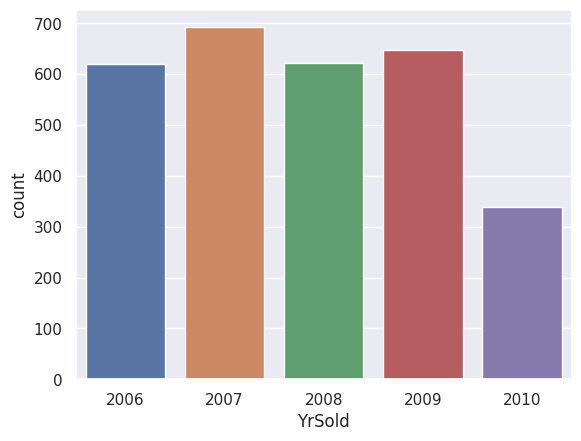

In [114]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, plot=True)

# 🧮 6. Understanding Numerical Features

count   2919.000
mean    1460.000
std      842.787
min        1.000
5%       146.900
10%      292.800
20%      584.600
30%      876.400
40%     1168.200
50%     1460.000
60%     1751.800
70%     2043.600
80%     2335.400
90%     2627.200
95%     2773.100
99%     2889.820
max     2919.000
Name: Id, dtype: float64


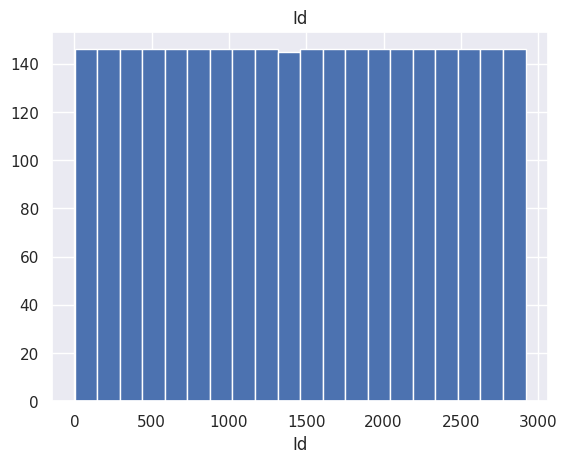

count   2919.000
mean      57.138
std       42.518
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64


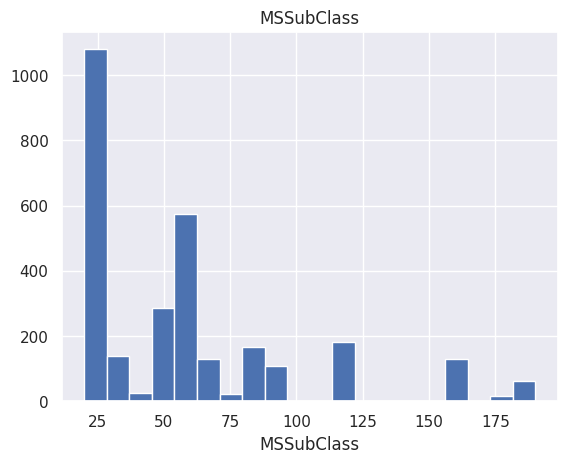

count   2433.000
mean      69.306
std       23.345
min       21.000
5%        32.000
10%       43.000
20%       53.000
30%       60.000
40%       63.000
50%       68.000
60%       73.000
70%       78.000
80%       84.000
90%       95.000
95%      107.000
99%      135.680
max      313.000
Name: LotFrontage, dtype: float64


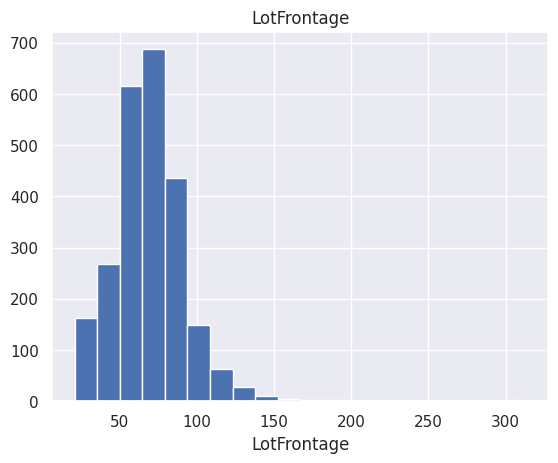

count     2919.000
mean     10168.114
std       7886.996
min       1300.000
5%        3182.000
10%       4922.400
20%       7007.600
30%       7960.400
40%       8741.000
50%       9453.000
60%      10151.600
70%      11001.200
80%      12203.800
90%      14300.600
95%      17142.900
99%      33038.640
max     215245.000
Name: LotArea, dtype: float64


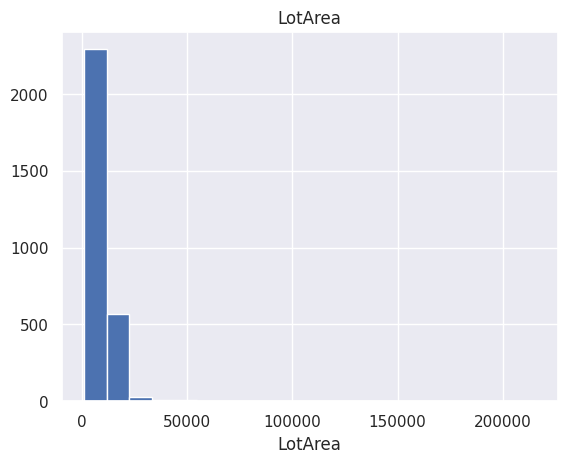

count   2919.000
mean       6.089
std        1.410
min        1.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        6.000
50%        6.000
60%        6.000
70%        7.000
80%        7.000
90%        8.000
95%        8.000
99%       10.000
max       10.000
Name: OverallQual, dtype: float64


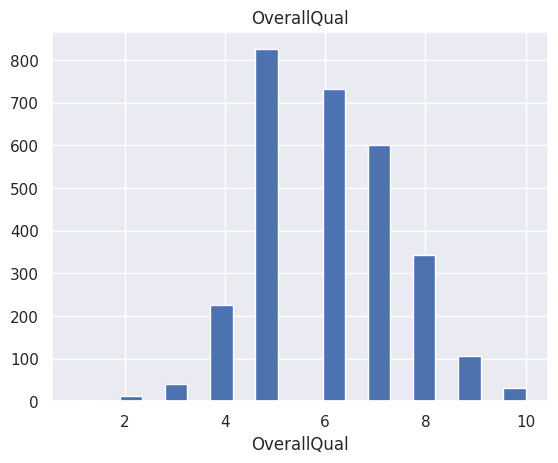

count   2919.000
mean    1971.313
std       30.291
min     1872.000
5%      1915.000
10%     1924.000
20%     1947.000
30%     1957.000
40%     1965.000
50%     1973.000
60%     1984.000
70%     1998.000
80%     2003.000
90%     2006.000
95%     2007.000
99%     2008.000
max     2010.000
Name: YearBuilt, dtype: float64


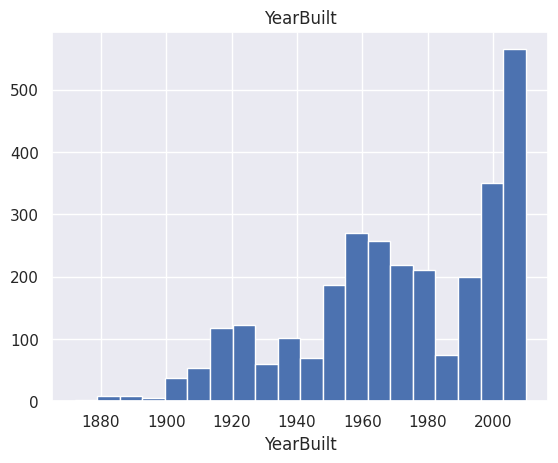

count   2919.000
mean    1984.264
std       20.894
min     1950.000
5%      1950.000
10%     1950.000
20%     1960.000
30%     1970.000
40%     1978.000
50%     1993.000
60%     1998.000
70%     2002.000
80%     2005.000
90%     2006.200
95%     2007.000
99%     2009.000
max     2010.000
Name: YearRemodAdd, dtype: float64


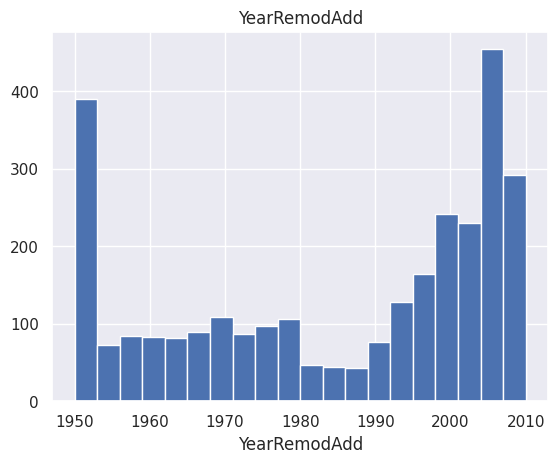

count   2896.000
mean     102.201
std      179.334
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%      120.000
80%      202.000
90%      325.500
95%      466.500
99%      771.050
max     1600.000
Name: MasVnrArea, dtype: float64


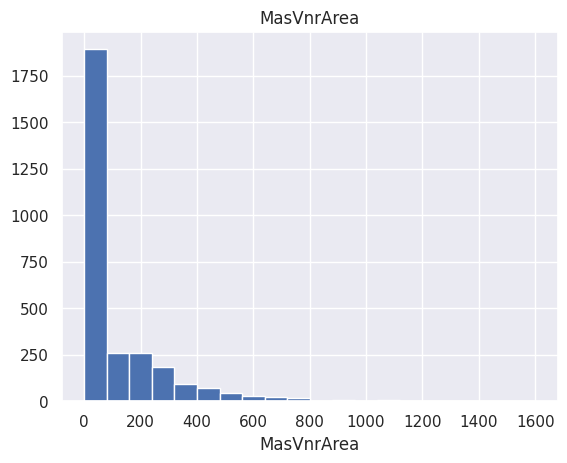

count   2918.000
mean     441.423
std      455.611
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%      202.600
50%      368.500
60%      515.200
70%      656.000
80%      812.000
90%     1056.900
95%     1274.000
99%     1635.320
max     5644.000
Name: BsmtFinSF1, dtype: float64


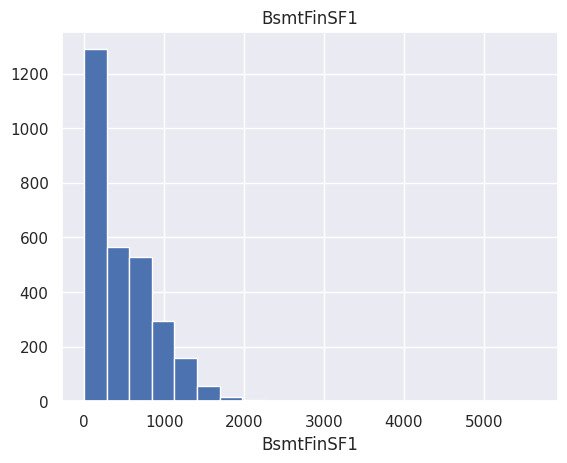

count   2918.000
mean      49.582
std      169.206
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      125.600
95%      435.000
99%      874.660
max     1526.000
Name: BsmtFinSF2, dtype: float64


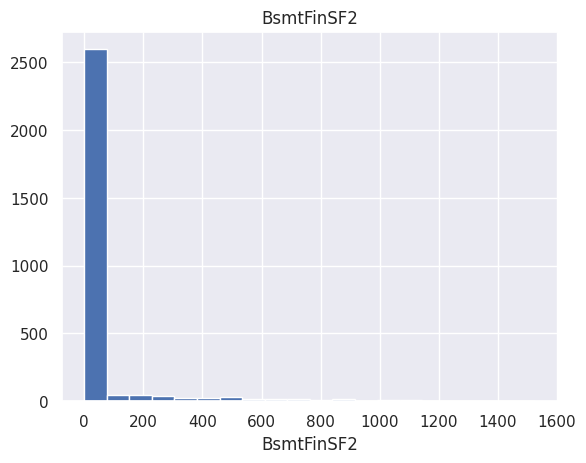

count   2918.000
mean     560.772
std      439.544
min        0.000
5%         0.000
10%       56.000
20%      174.000
30%      270.000
40%      365.800
50%      467.000
60%      595.000
70%      732.000
80%      892.600
90%     1212.600
95%     1474.900
99%     1776.490
max     2336.000
Name: BsmtUnfSF, dtype: float64


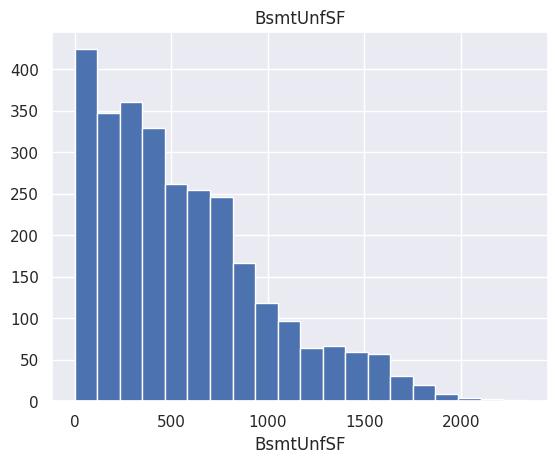

count   2918.000
mean    1051.778
std      440.766
min        0.000
5%       455.250
10%      600.000
20%      741.000
30%      836.000
40%      911.000
50%      989.500
60%     1089.200
70%     1216.000
80%     1392.000
90%     1614.000
95%     1776.150
99%     2198.300
max     6110.000
Name: TotalBsmtSF, dtype: float64


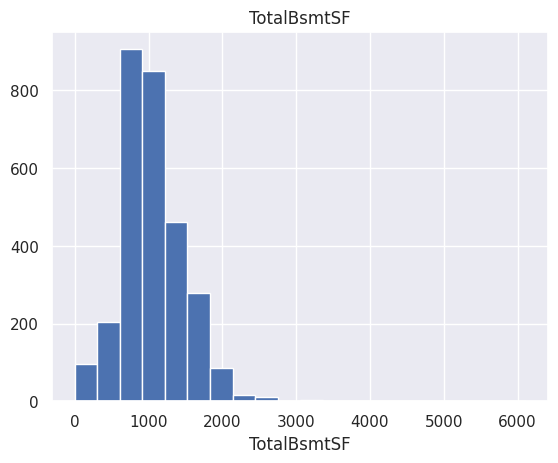

count   2919.000
mean    1159.582
std      392.362
min      334.000
5%       665.900
10%      744.800
20%      847.000
30%      914.000
40%      996.200
50%     1082.000
60%     1180.000
70%     1314.000
80%     1483.400
90%     1675.000
95%     1830.100
99%     2288.020
max     5095.000
Name: 1stFlrSF, dtype: float64


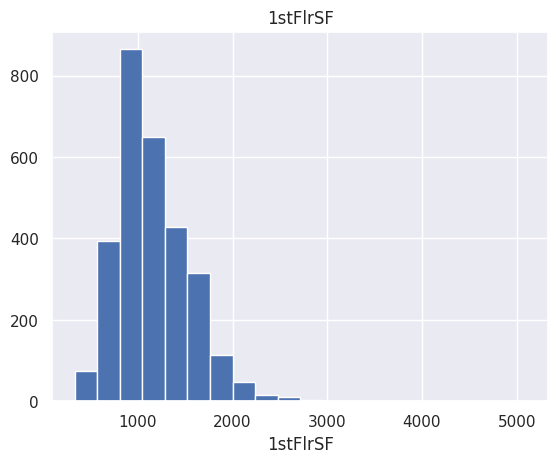

count   2919.000
mean     336.484
std      428.701
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      427.400
70%      636.000
80%      770.800
90%      925.000
95%     1131.200
99%     1400.200
max     2065.000
Name: 2ndFlrSF, dtype: float64


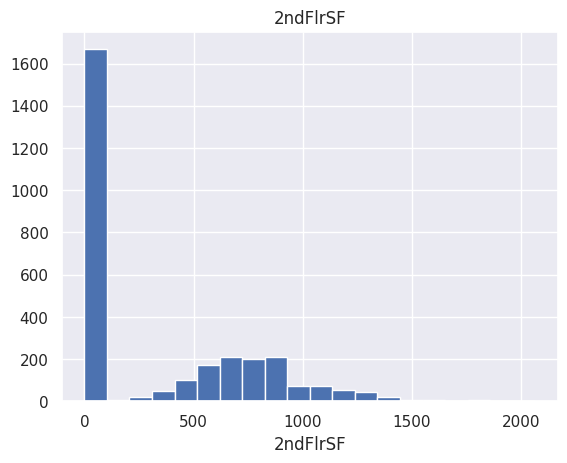

count   2919.000
mean       4.694
std       46.397
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      153.840
max     1064.000
Name: LowQualFinSF, dtype: float64


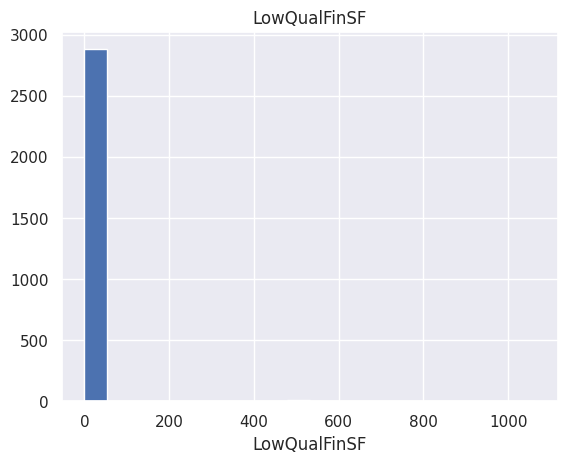

count   2919.000
mean    1500.760
std      506.051
min      334.000
5%       861.000
10%      923.800
20%     1064.600
30%     1200.000
40%     1329.200
50%     1444.000
60%     1560.000
70%     1680.000
80%     1838.400
90%     2153.200
95%     2464.200
99%     2935.720
max     5642.000
Name: GrLivArea, dtype: float64


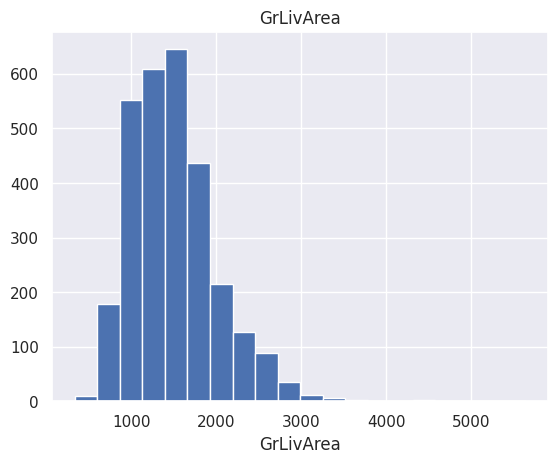

count   2919.000
mean       6.452
std        1.569
min        2.000
5%         4.000
10%        5.000
20%        5.000
30%        6.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%        8.000
95%        9.000
99%       11.000
max       15.000
Name: TotRmsAbvGrd, dtype: float64


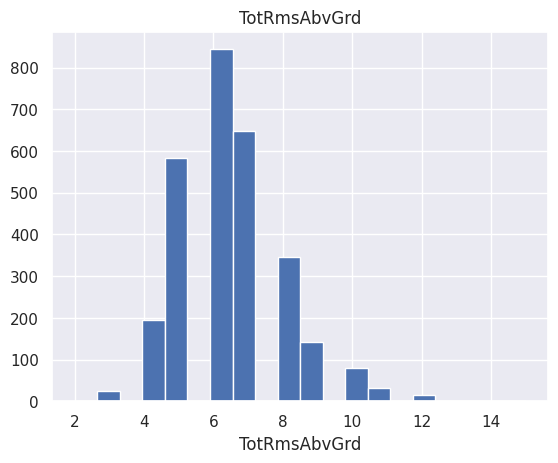

count   2760.000
mean    1978.113
std       25.574
min     1895.000
5%      1928.000
10%     1941.000
20%     1957.000
30%     1964.000
40%     1972.000
50%     1979.000
60%     1993.000
70%     1999.000
80%     2004.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2207.000
Name: GarageYrBlt, dtype: float64


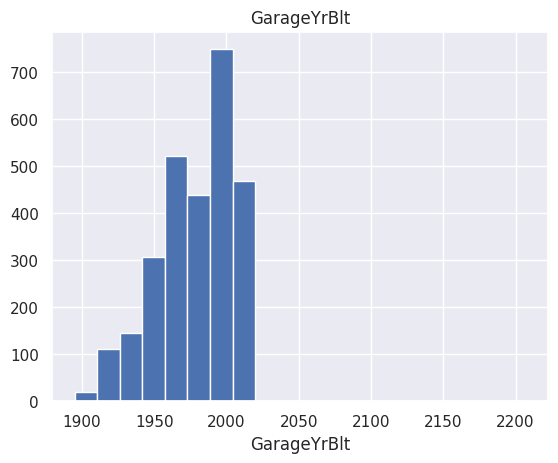

count   2918.000
mean     472.875
std      215.395
min        0.000
5%         0.000
10%      240.000
20%      296.000
30%      379.000
40%      440.000
50%      480.000
60%      513.000
70%      560.900
80%      621.000
90%      758.000
95%      856.150
99%     1019.490
max     1488.000
Name: GarageArea, dtype: float64


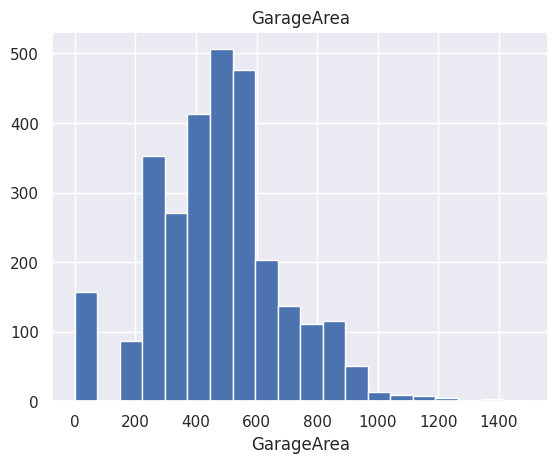

count   2919.000
mean      93.710
std      126.527
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      100.000
70%      144.000
80%      192.000
90%      257.000
95%      328.000
99%      500.820
max     1424.000
Name: WoodDeckSF, dtype: float64


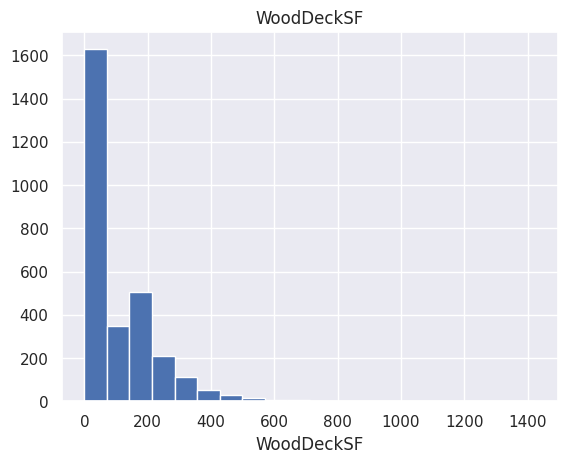

count   2919.000
mean      47.487
std       67.575
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%       26.000
60%       40.000
70%       58.000
80%       85.000
90%      131.200
95%      183.100
99%      284.460
max      742.000
Name: OpenPorchSF, dtype: float64


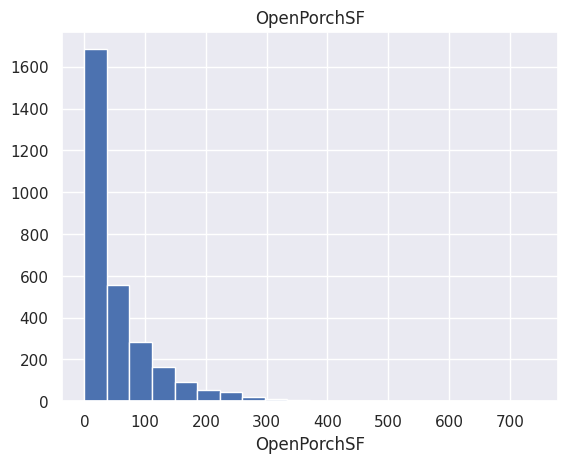

count   2919.000
mean      23.098
std       64.244
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      112.000
95%      176.000
99%      264.000
max     1012.000
Name: EnclosedPorch, dtype: float64


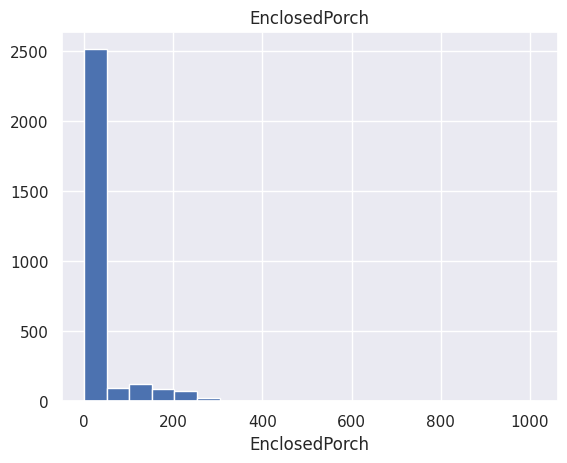

count   2919.000
mean       2.602
std       25.188
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      144.000
max      508.000
Name: 3SsnPorch, dtype: float64


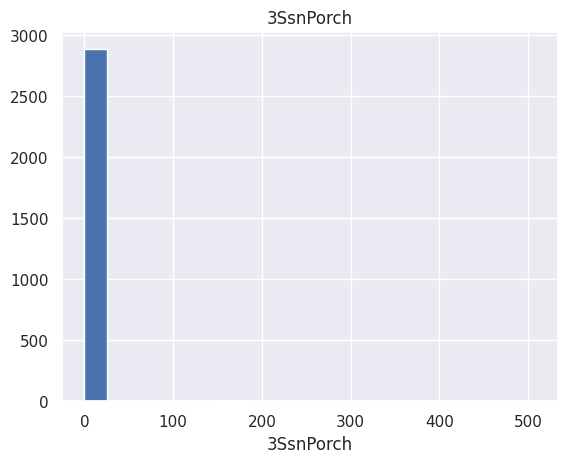

count   2919.000
mean      16.062
std       56.184
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%      161.000
99%      259.820
max      576.000
Name: ScreenPorch, dtype: float64


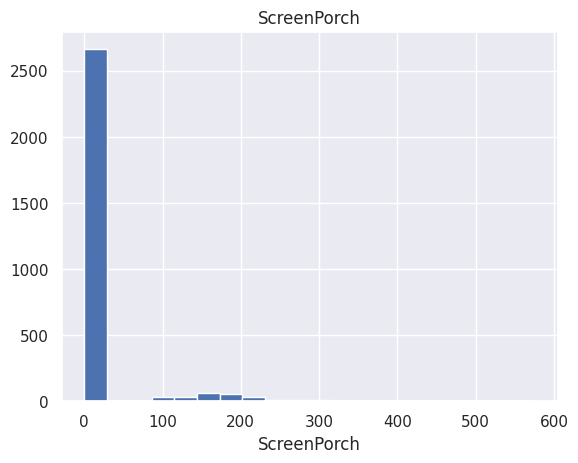

count   2919.000
mean       2.252
std       35.664
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%        0.000
max      800.000
Name: PoolArea, dtype: float64


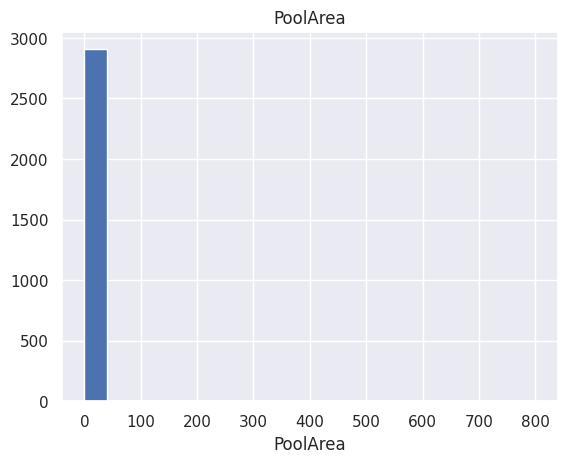

count    2919.000
mean       50.826
std       567.402
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%       982.000
max     17000.000
Name: MiscVal, dtype: float64


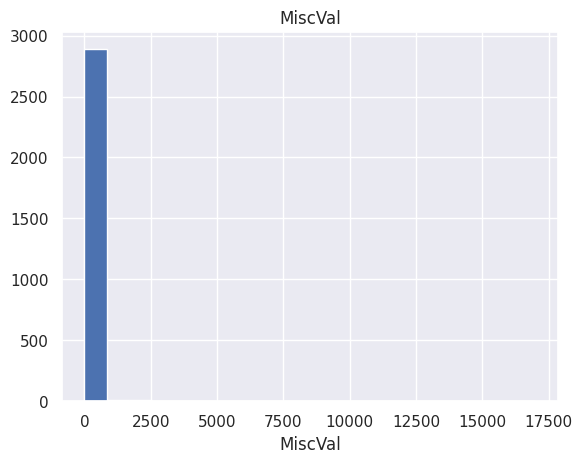

count   2919.000
mean       6.213
std        2.715
min        1.000
5%         2.000
10%        3.000
20%        4.000
30%        5.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%       10.000
95%       11.000
99%       12.000
max       12.000
Name: MoSold, dtype: float64


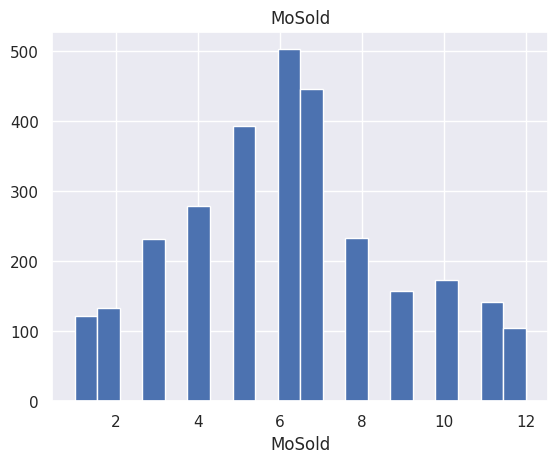

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
20%     124000.000
30%     135500.000
40%     147000.000
50%     163000.000
60%     179280.000
70%     198620.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64


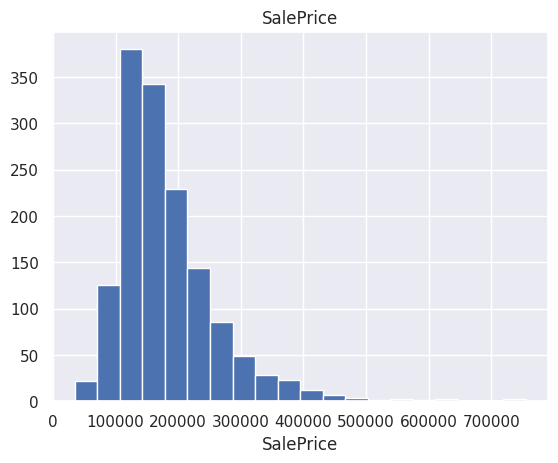

In [115]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)

# 📌 7. Analysis of Categorical Variables by Target

          TARGET_MEAN
MSZoning             
C (all)     74528.000
FV         214014.062
RH         131558.375
RL         191004.995
RM         126316.830




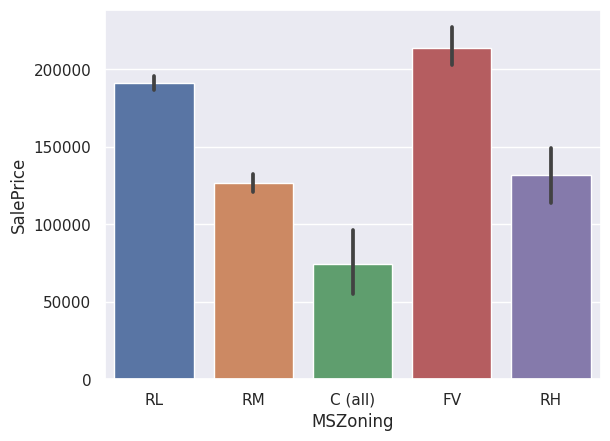

        TARGET_MEAN
Street             
Grvl     130190.500
Pave     181130.539




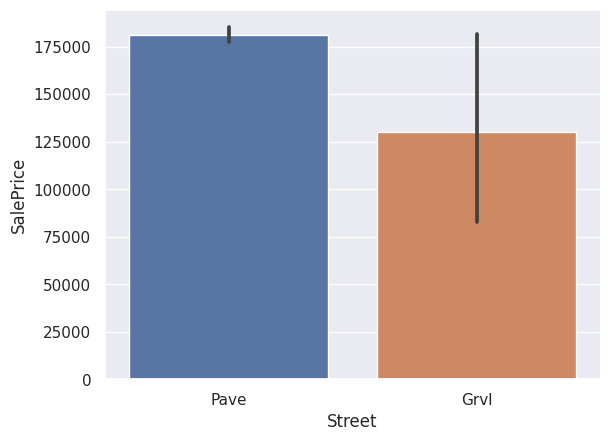

       TARGET_MEAN
Alley             
Grvl    122219.080
Pave    168000.585




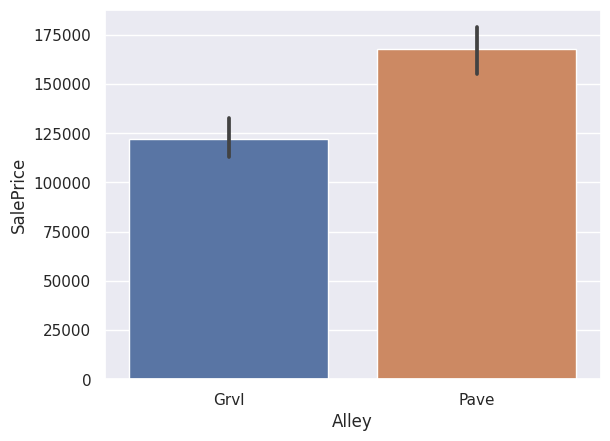

          TARGET_MEAN
LotShape             
IR1        206101.665
IR2        239833.366
IR3        216036.500
Reg        164754.818




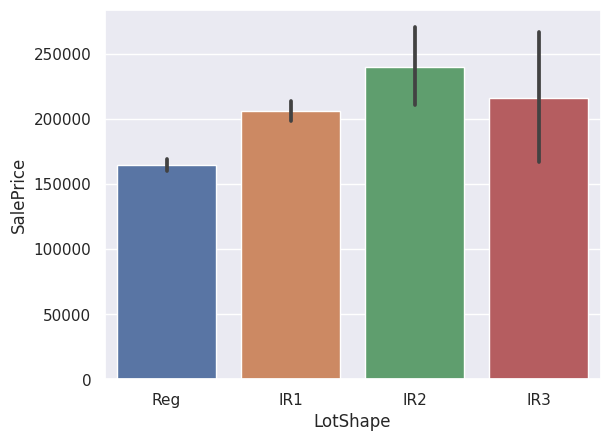

             TARGET_MEAN
LandContour             
Bnk           143104.079
HLS           231533.940
Low           203661.111
Lvl           180183.747




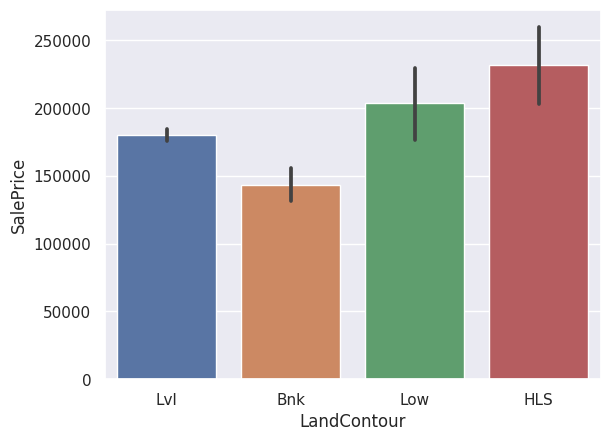

           TARGET_MEAN
Utilities             
AllPub      180950.957
NoSeWa      137500.000




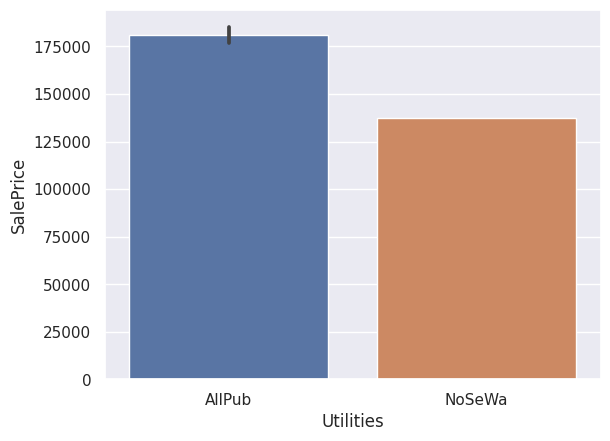

           TARGET_MEAN
LotConfig             
Corner      181623.426
CulDSac     223854.617
FR2         177934.574
FR3         208475.000
Inside      176938.048




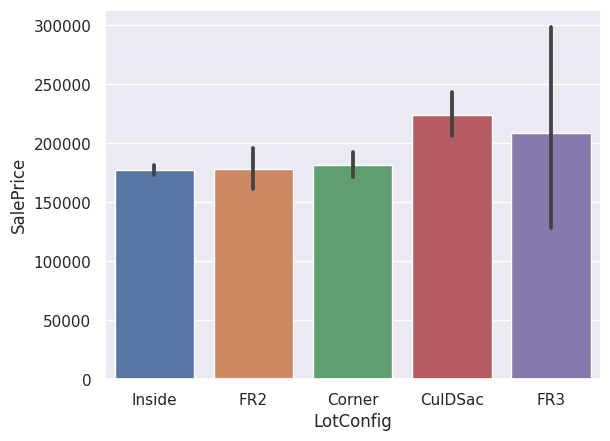

           TARGET_MEAN
LandSlope             
Gtl         179956.800
Mod         196734.138
Sev         204379.231




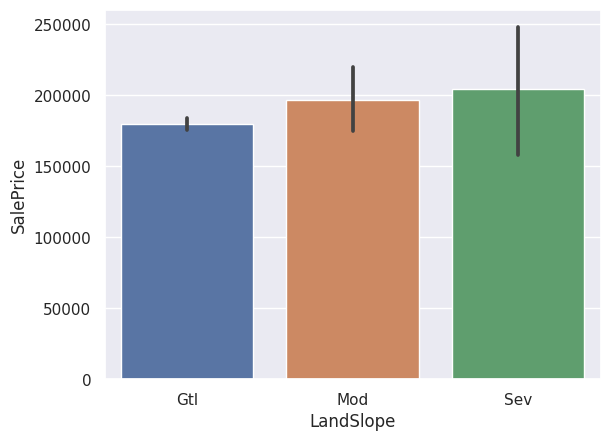

            TARGET_MEAN
Condition1             
Artery       135091.667
Feedr        142475.481
Norm         184495.492
PosA         225875.000
PosN         215184.211
RRAe         138400.000
RRAn         184396.615
RRNe         190750.000
RRNn         212400.000




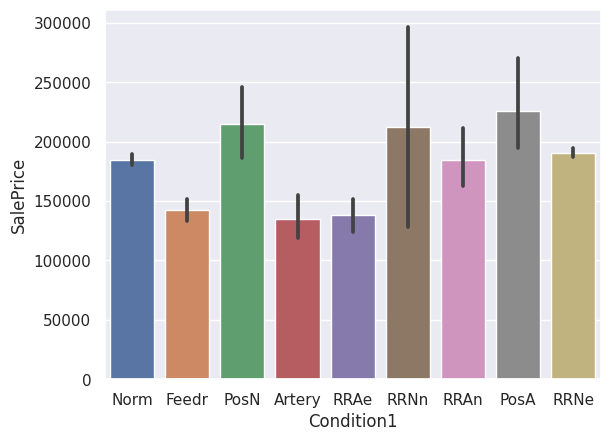

            TARGET_MEAN
Condition2             
Artery       106500.000
Feedr        121166.667
Norm         181169.406
PosA         325000.000
PosN         284875.000
RRAe         190000.000
RRAn         136905.000
RRNn          96750.000




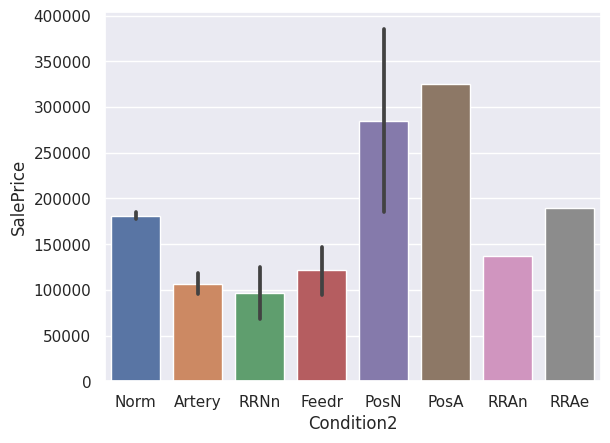

          TARGET_MEAN
BldgType             
1Fam       185763.807
2fmCon     128432.258
Duplex     133541.077
Twnhs      135911.628
TwnhsE     181959.342




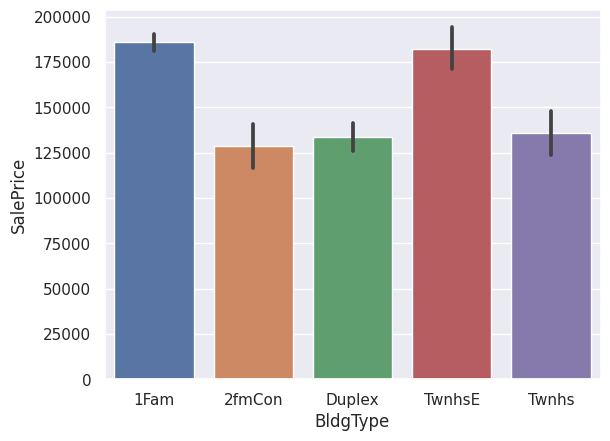

            TARGET_MEAN
HouseStyle             
1.5Fin       143116.740
1.5Unf       110150.000
1Story       175985.478
2.5Fin       220000.000
2.5Unf       157354.545
2Story       210051.764
SFoyer       135074.486
SLvl         166703.385




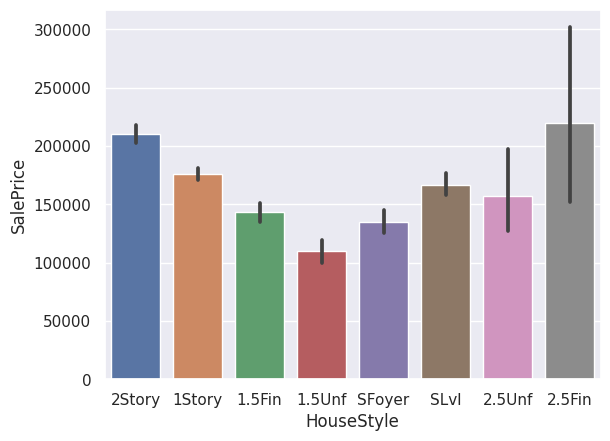

           TARGET_MEAN
RoofStyle             
Flat        194690.000
Gable       171483.956
Gambrel     148909.091
Hip         218876.934
Mansard     180568.429
Shed        225000.000




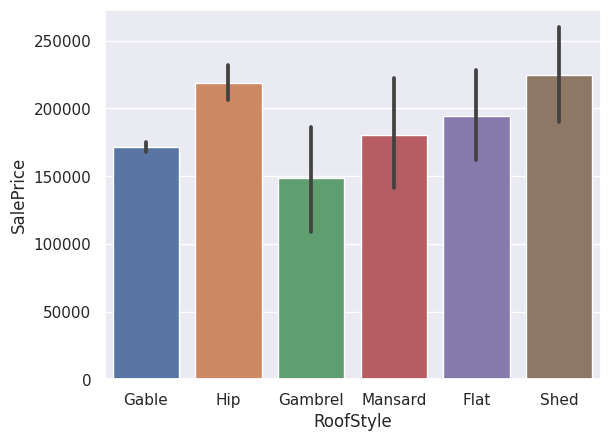

          TARGET_MEAN
RoofMatl             
ClyTile    160000.000
CompShg    179803.679
Membran    241500.000
Metal      180000.000
Roll       137000.000
Tar&Grv    185406.364
WdShake    241400.000
WdShngl    390250.000




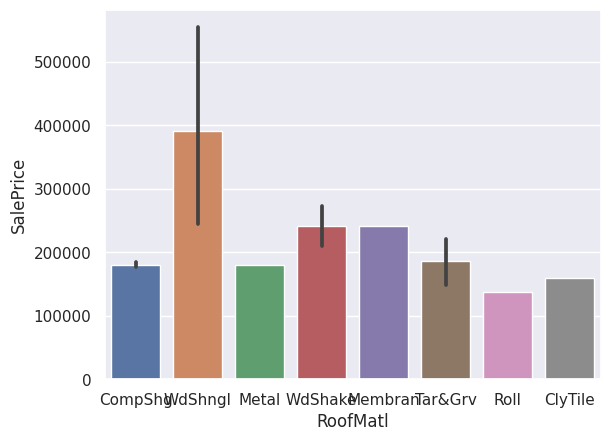

             TARGET_MEAN
Exterior1st             
AsbShng       107385.550
AsphShn       100000.000
BrkComm        71000.000
BrkFace       194573.000
CBlock        105000.000
CemntBd       231690.656
HdBoard       163077.450
ImStucc       262000.000
MetalSd       149422.177
Plywood       175942.380
Stone         258500.000
Stucco        162990.000
VinylSd       213732.901
Wd Sdng       149841.646
WdShing       150655.077




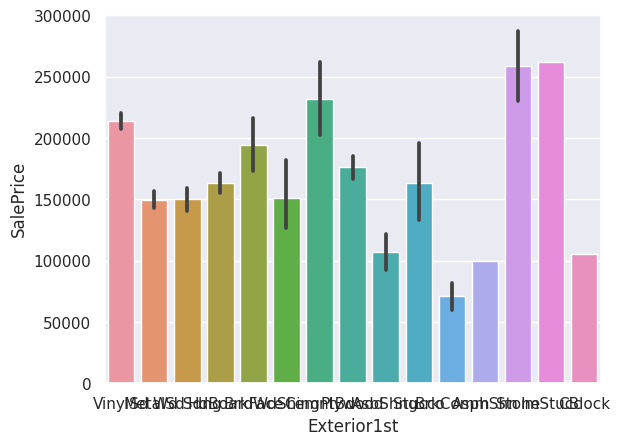

             TARGET_MEAN
Exterior2nd             
AsbShng       114060.550
AsphShn       138000.000
Brk Cmn       126714.286
BrkFace       195818.000
CBlock        105000.000
CmentBd       230093.833
HdBoard       167661.565
ImStucc       252070.000
MetalSd       149803.173
Other         319000.000
Plywood       168112.387
Stone         158224.800
Stucco        155905.154
VinylSd       214432.460
Wd Sdng       148386.066
Wd Shng       161328.947




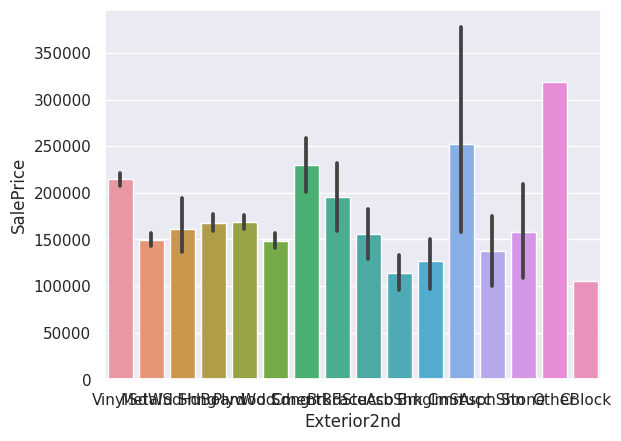

            TARGET_MEAN
MasVnrType             
BrkCmn       146318.067
BrkFace      204691.872
Stone        265583.625




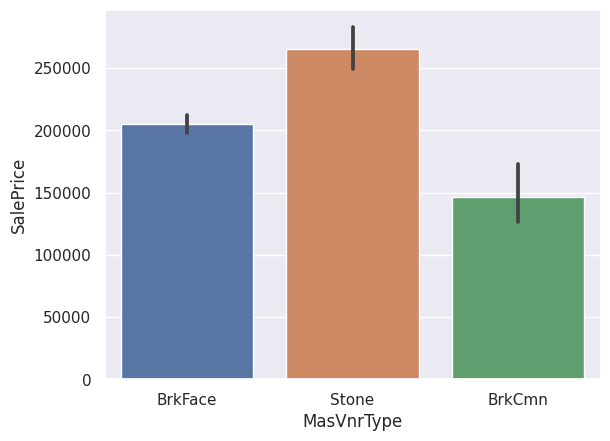

           TARGET_MEAN
ExterQual             
Ex          367360.962
Fa           87985.214
Gd          231633.510
TA          144341.313




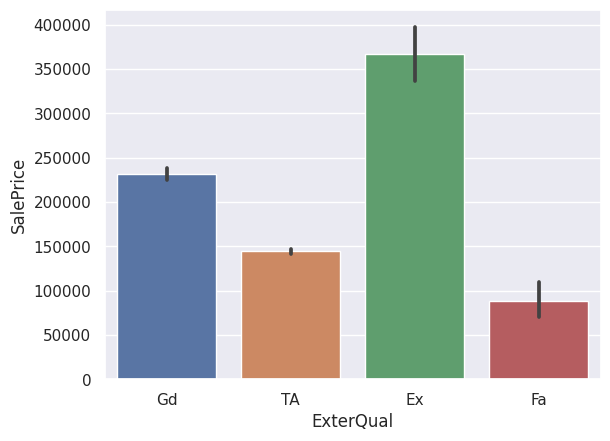

           TARGET_MEAN
ExterCond             
Ex          201333.333
Fa          102595.143
Gd          168897.568
Po           76500.000
TA          184034.896




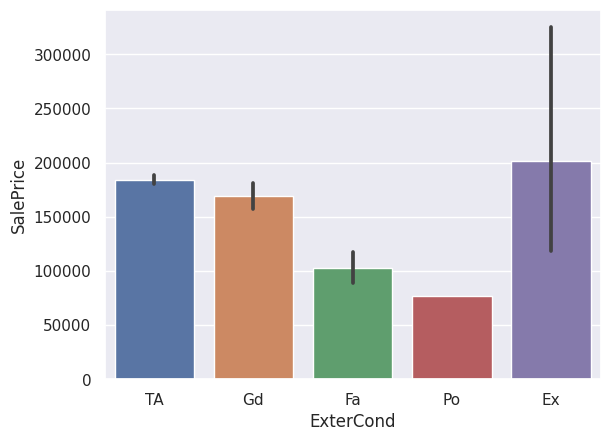

            TARGET_MEAN
Foundation             
BrkTil       132291.075
CBlock       149805.715
PConc        225230.442
Slab         107365.625
Stone        165959.167
Wood         185666.667




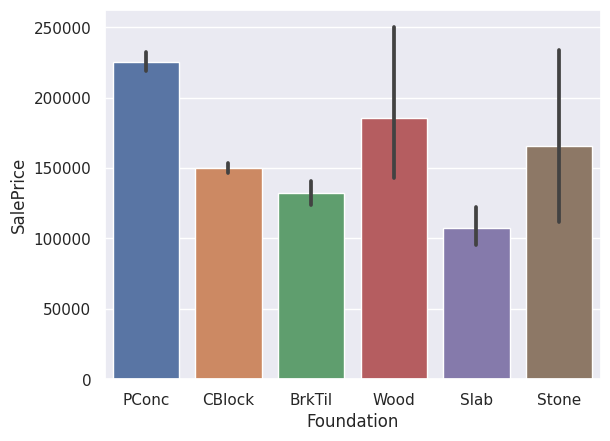

          TARGET_MEAN
BsmtQual             
Ex         327041.041
Fa         115692.029
Gd         202688.479
TA         140759.818




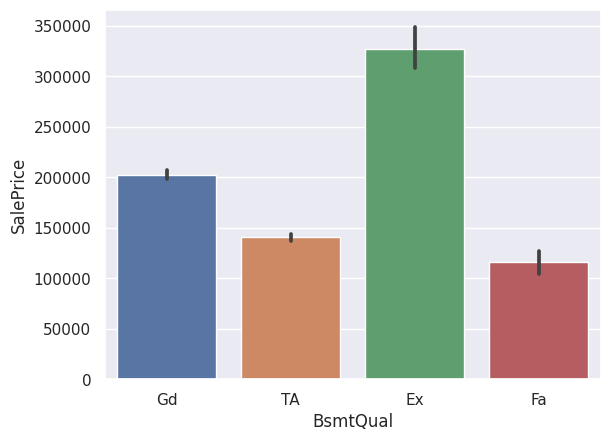

          TARGET_MEAN
BsmtCond             
Fa         121809.533
Gd         213599.908
Po          64000.000
TA         183632.621




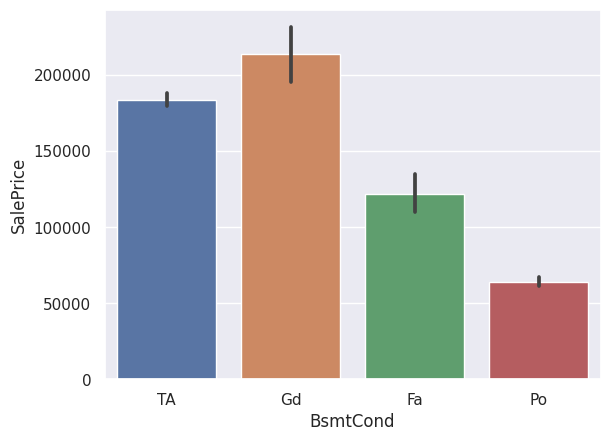

              TARGET_MEAN
BsmtExposure             
Av             206643.421
Gd             257689.806
Mn             192789.658
No             165652.296




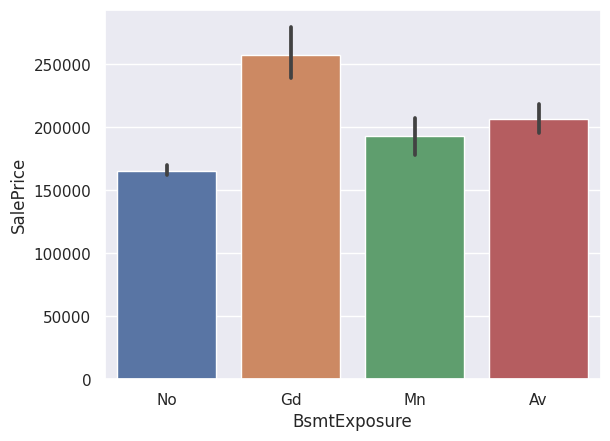

              TARGET_MEAN
BsmtFinType1             
ALQ            161573.068
BLQ            149493.655
GLQ            235413.720
LwQ            151852.703
Rec            146889.248
Unf            170670.577




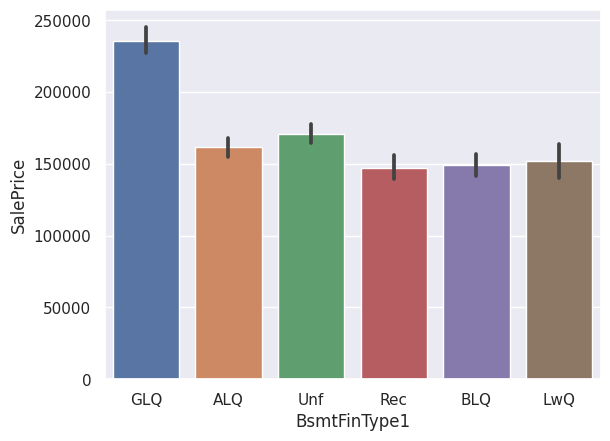

              TARGET_MEAN
BsmtFinType2             
ALQ            209942.105
BLQ            151101.000
GLQ            180982.143
LwQ            164364.130
Rec            164917.130
Unf            184694.690




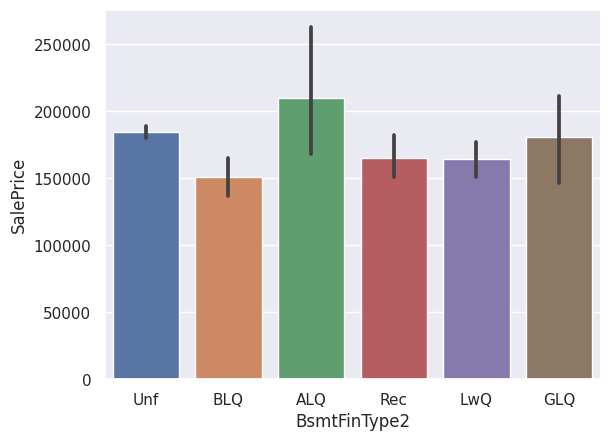

         TARGET_MEAN
Heating             
Floor      72500.000
GasA      182021.195
GasW      166632.167
Grav       75271.429
OthW      125750.000
Wall       92100.000




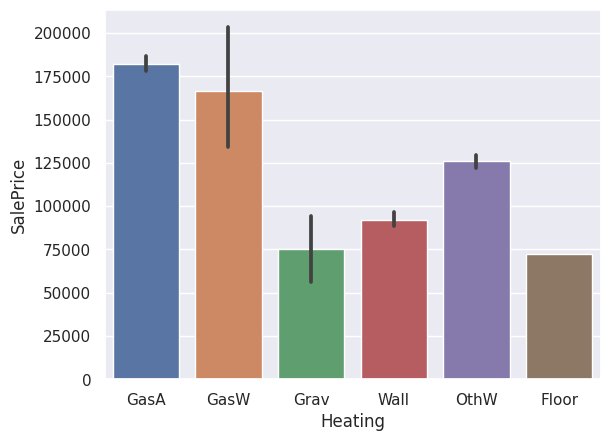

           TARGET_MEAN
HeatingQC             
Ex          214914.429
Fa          123919.490
Gd          156858.871
Po           87000.000
TA          142362.876




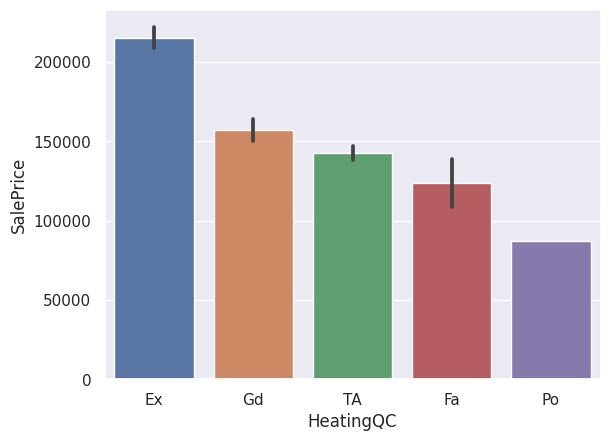

            TARGET_MEAN
CentralAir             
N            105264.074
Y            186186.710




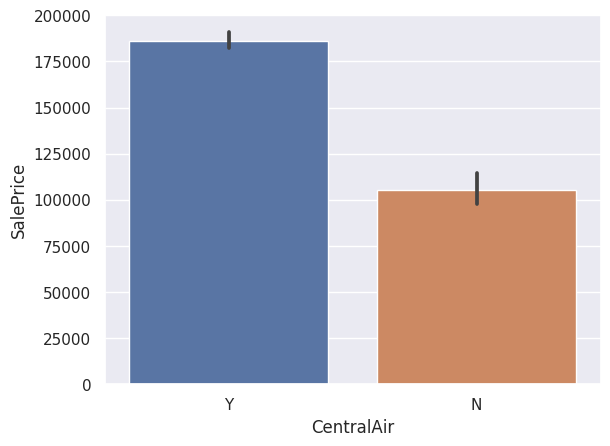

            TARGET_MEAN
Electrical             
FuseA        122196.894
FuseF        107675.444
FuseP         97333.333
Mix           67000.000
SBrkr        186825.113




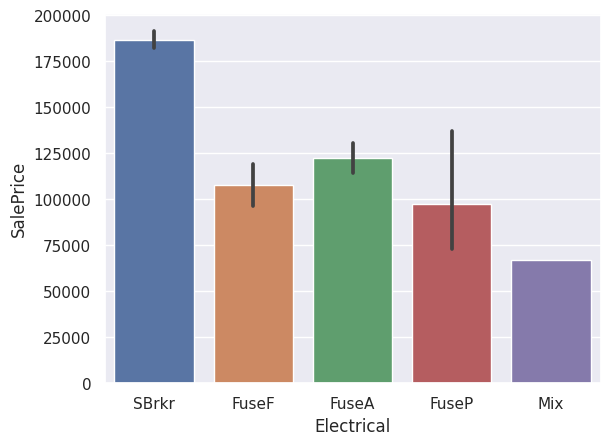

             TARGET_MEAN
KitchenQual             
Ex            328554.670
Fa            105565.205
Gd            212116.024
TA            139962.512




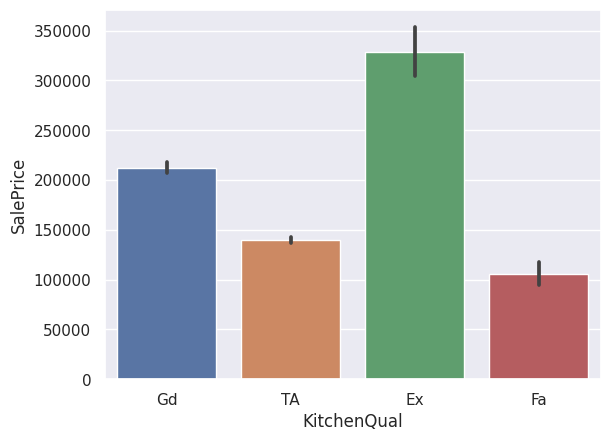

            TARGET_MEAN
Functional             
Maj1         153948.143
Maj2          85800.000
Min1         146385.484
Min2         144240.647
Mod          168393.333
Sev          129000.000
Typ          183429.147




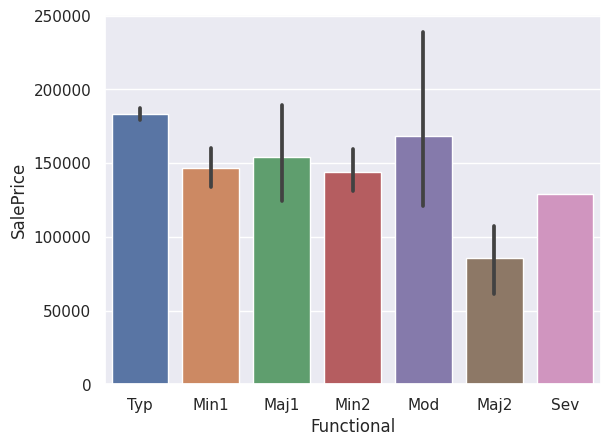

             TARGET_MEAN
FireplaceQu             
Ex            337712.500
Fa            167298.485
Gd            226351.416
Po            129764.150
TA            205723.489




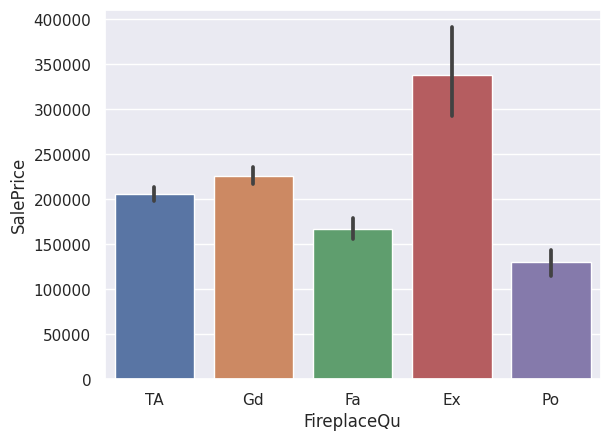

            TARGET_MEAN
GarageType             
2Types       151283.333
Attchd       202892.656
Basment      160570.684
BuiltIn      254751.739
CarPort      109962.111
Detchd       134091.163




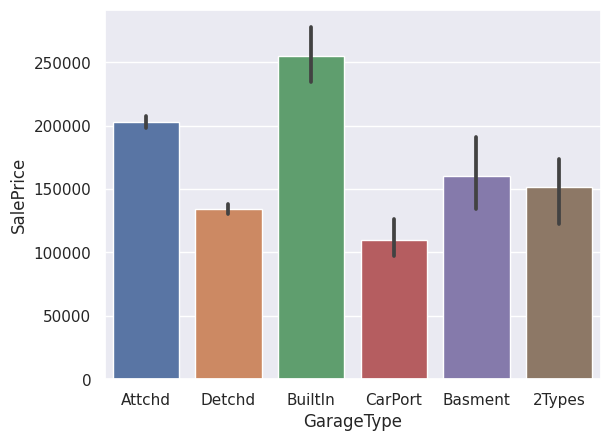

              TARGET_MEAN
GarageFinish             
Fin            240052.690
RFn            202068.870
Unf            142156.423




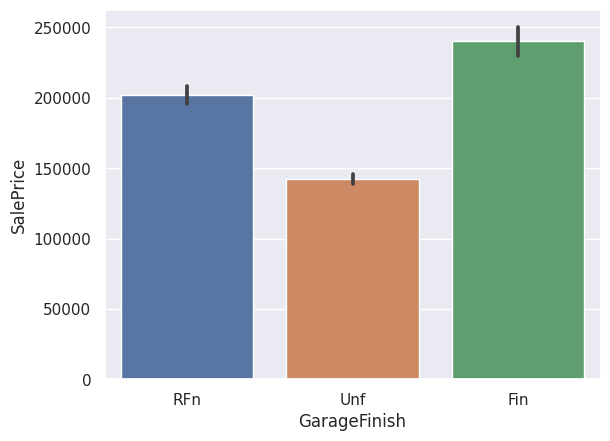

            TARGET_MEAN
GarageQual             
Ex           241000.000
Fa           123573.354
Gd           215860.714
Po           100166.667
TA           187489.836




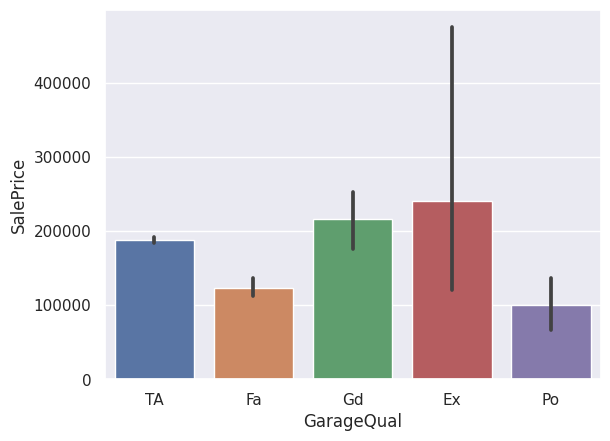

            TARGET_MEAN
GarageCond             
Ex           124000.000
Fa           114654.029
Gd           179930.000
Po           108500.000
TA           187885.735




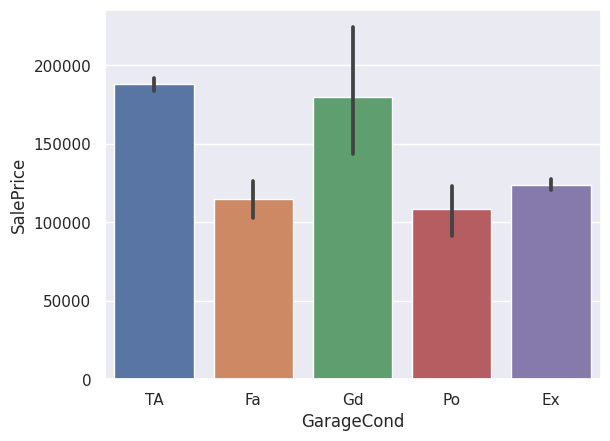

            TARGET_MEAN
PavedDrive             
N            115039.122
P            132330.000
Y            186433.974




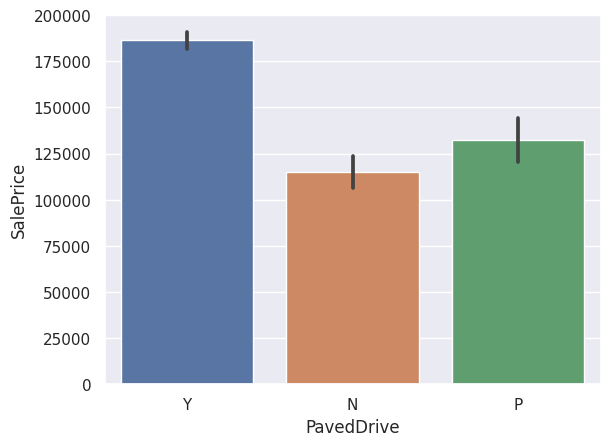

        TARGET_MEAN
PoolQC             
Ex       490000.000
Fa       215500.000
Gd       201990.000




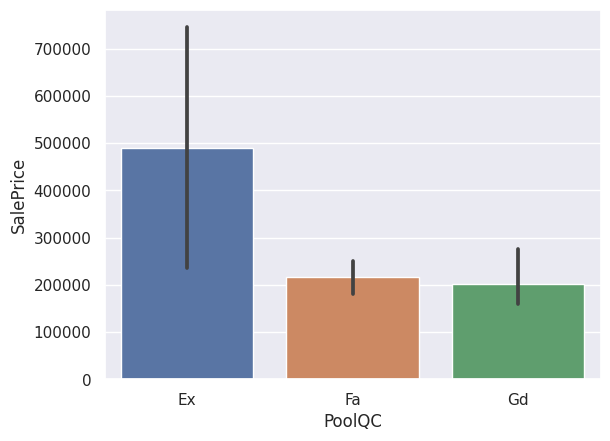

       TARGET_MEAN
Fence             
GdPrv   178927.458
GdWo    140379.315
MnPrv   148751.089
MnWw    134286.364




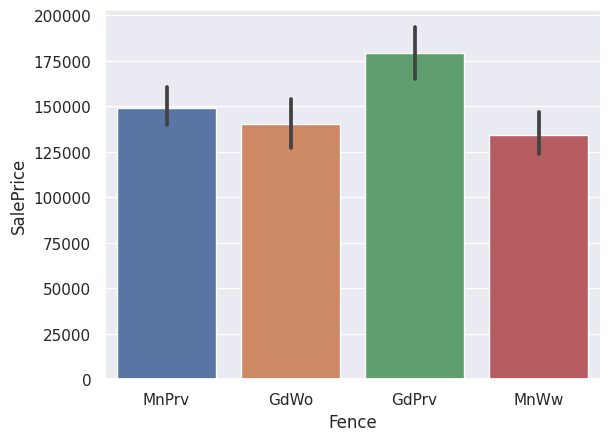

             TARGET_MEAN
MiscFeature             
Gar2          170750.000
Othr           94000.000
Shed          151187.612
TenC          250000.000




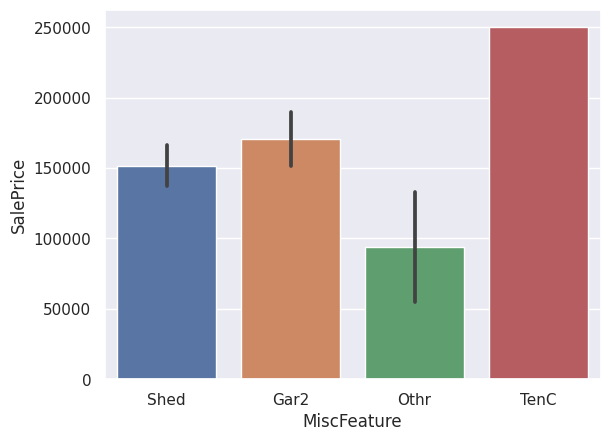

          TARGET_MEAN
SaleType             
COD        143973.256
CWD        210600.000
Con        269600.000
ConLD      138780.889
ConLI      200390.000
ConLw      143700.000
New        274945.418
Oth        119850.000
WD         173401.837




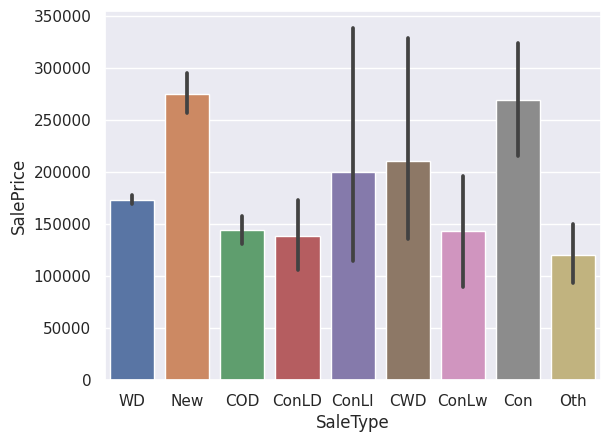

               TARGET_MEAN
SaleCondition             
Abnorml         146526.624
AdjLand         104125.000
Alloca          167377.417
Family          149600.000
Normal          175202.220
Partial         272291.752




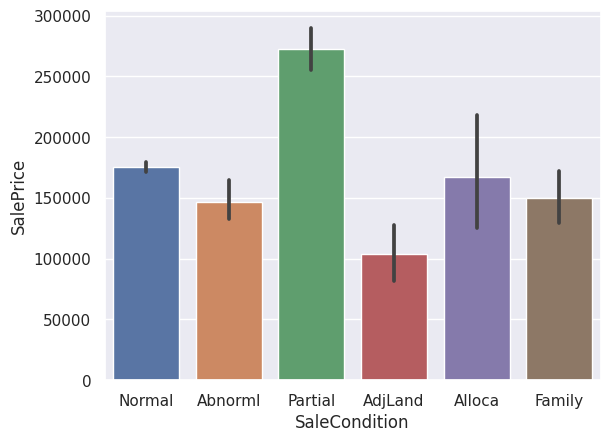

             TARGET_MEAN
OverallCond             
1              61000.000
2             141986.400
3             101929.400
4             120438.439
5             203146.915
6             153961.591
7             158145.488
8             155651.736
9             216004.545




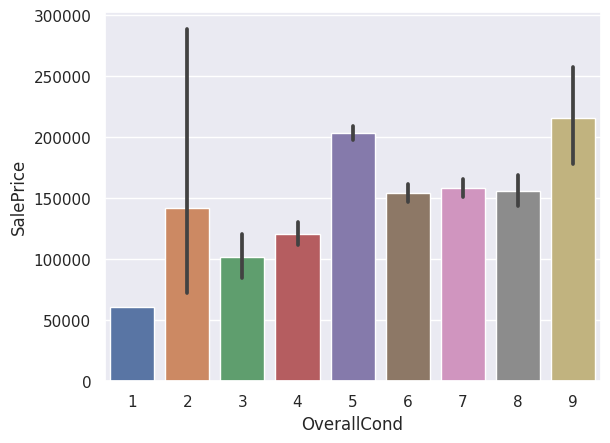

              TARGET_MEAN
BsmtFullBath             
0.000          165521.640
1.000          202522.918
2.000          213063.067
3.000          179000.000




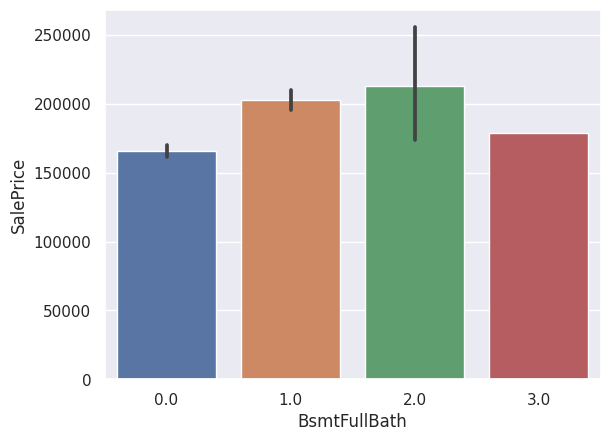

              TARGET_MEAN
BsmtHalfBath             
0.000          181230.330
1.000          176098.125
2.000          160850.500




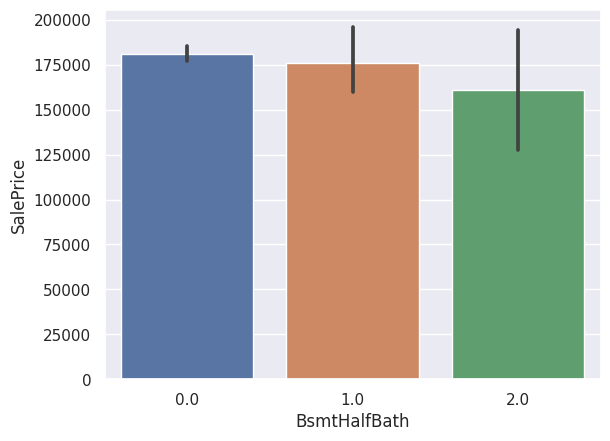

          TARGET_MEAN
FullBath             
0          165200.889
1          134751.440
2          213009.826
3          347822.909
4                 NaN




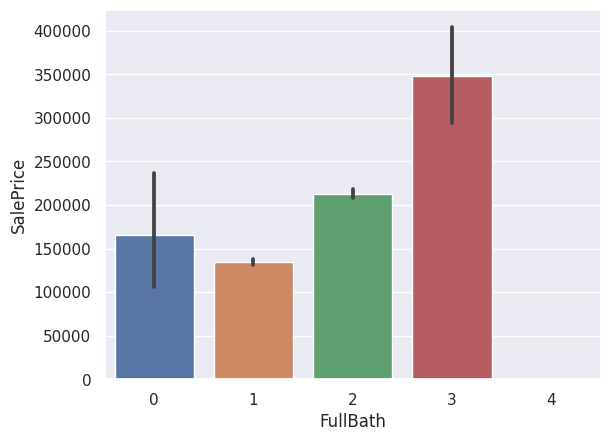

          TARGET_MEAN
HalfBath             
0          162534.885
1          212721.961
2          162028.917




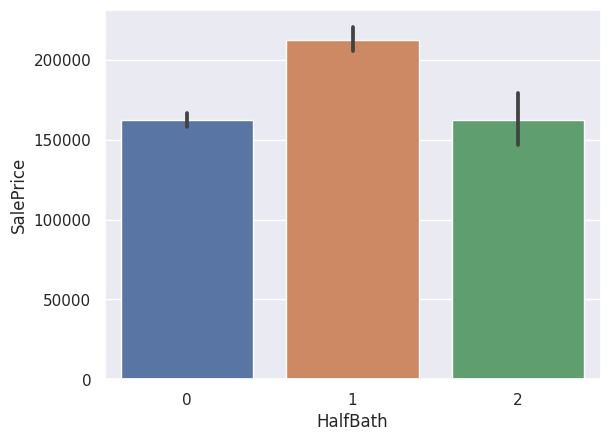

              TARGET_MEAN
BedroomAbvGr             
0              221493.167
1              173162.420
2              158197.659
3              181056.871
4              220421.254
5              180819.048
6              143779.000
8              200000.000




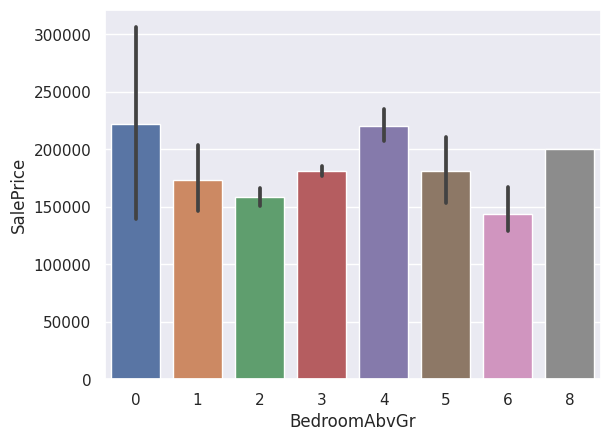

              TARGET_MEAN
KitchenAbvGr             
0              127500.000
1              183388.790
2              131096.154
3              109500.000




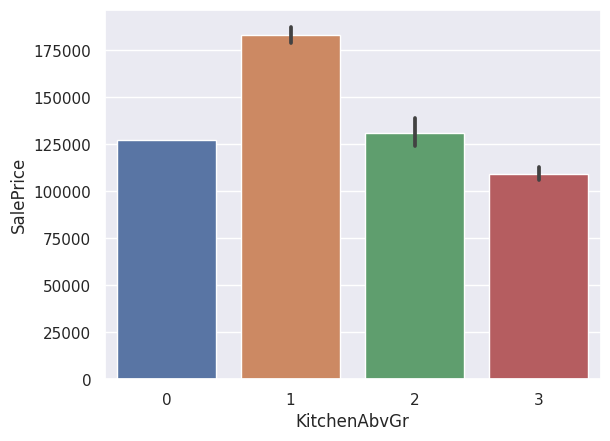

            TARGET_MEAN
Fireplaces             
0            141331.483
1            211843.909
2            240588.539
3            252000.000
4                   NaN




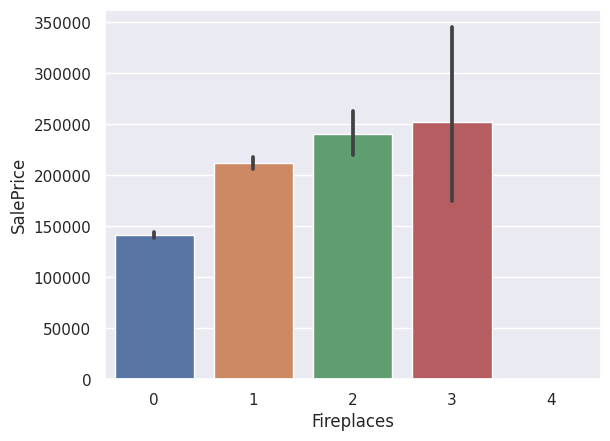

            TARGET_MEAN
GarageCars             
0.000        103317.284
1.000        128116.688
2.000        183851.664
3.000        309636.122
4.000        192655.800
5.000               NaN




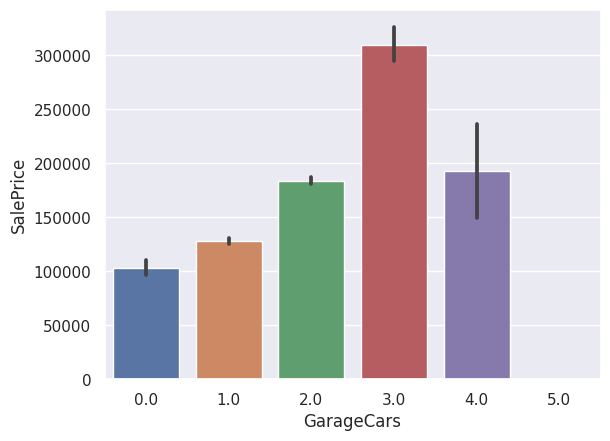

        TARGET_MEAN
YrSold             
2006     182549.459
2007     186063.152
2008     177360.839
2009     179432.104
2010     177393.674




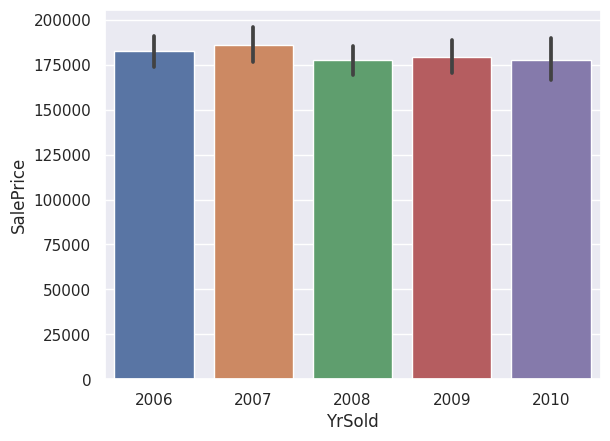

In [116]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    target_summary_with_cat(df, 'SalePrice', col, plot=True)


# 📌 8. Analysis of Numerical Variables by Target

In [117]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

for col in num_cols:
    target_summary_with_cat(df, 'SalePrice', col, plot=False)

      TARGET_MEAN
Id               
1      208500.000
2      181500.000
3      223500.000
4      140000.000
5      250000.000
...           ...
2915          NaN
2916          NaN
2917          NaN
2918          NaN
2919          NaN

[2919 rows x 1 columns]


            TARGET_MEAN
MSSubClass             
20           185224.812
30            95829.725
40           156125.000
45           108591.667
50           143302.972
60           239948.502
70           166772.417
75           192437.500
80           169736.552
85           147810.000
90           133541.077
120          200779.080
150                 NaN
160          138647.381
180          102300.000
190          129613.333


             TARGET_MEAN
LotFrontage             
21.000         94278.261
22.000               NaN
24.000        145226.316
25.000               NaN
26.000               NaN
...                  ...
174.000       319000.000
182.000       259000.000
195.000              NaN
200.000              NaN
313.0

# 📈 9. Correlation Heatmap & Analysis

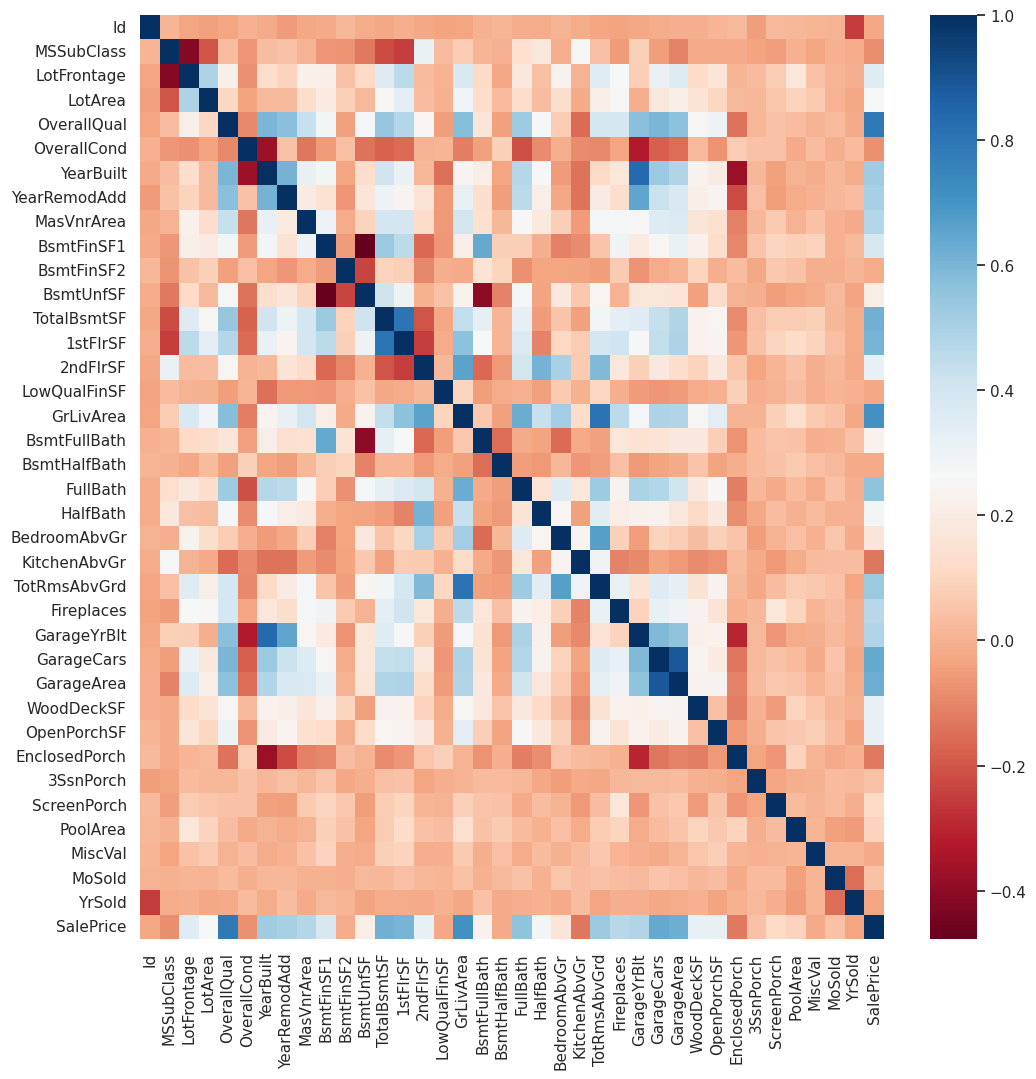

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [118]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    # Sadece numerik kolonları al
    df_numeric = dataframe.select_dtypes(include=[np.number])
    
    # Korelasyon matrisi
    corr = df_numeric.corr()
    cor_matrix = corr.abs()

    # Üst üçgen
    upper_triangle_matrix = cor_matrix.where(
        np.triu(np.ones(cor_matrix.shape), k=1).astype(bool)
    )

    # Eşik üzerindeki korelasyonlar
    drop_list = [col for col in upper_triangle_matrix.columns 
                 if any(upper_triangle_matrix[col] > corr_th)]

    # Plot opsiyonu
    if plot:
        plt.figure(figsize=(12, 12))
        sns.heatmap(corr, cmap="RdBu", annot=False)
        plt.show()

    return drop_list


high_correlated_cols(df, plot=True)

In [119]:
df_num = df[num_cols]

corr_features = pd.DataFrame(
    df_num.corr()['SalePrice']
    .drop('SalePrice', axis=0)
    .sort_values(ascending=False)
)

corr_features.apply(lambda x: round(x, 3) * 100).head(50)

,SalePrice
OverallQual,79.100
GrLivArea,70.900
GarageArea,62.300
TotalBsmtSF,61.400
1stFlrSF,60.600
TotRmsAbvGrd,53.400
YearBuilt,52.300
YearRemodAdd,50.700
GarageYrBlt,48.600
MasVnrArea,47.700


In [120]:
def high_correlated_cols(dataframe, head=10):
    # sadece numerik kolonları al
    df_num = dataframe.select_dtypes(include=[np.number])
    
    # korelasyon matrisi
    corr_matrix = df_num.corr().abs()
    
    # üst üçgen ile yüksek korelasyon çiftleri
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        .stack()
        .sort_values(ascending=False)
        .head(head)
    )
    
    return corr_pairs

high_correlated_cols(df, 20)

GarageCars    GarageArea     0.890
YearBuilt     GarageYrBlt    0.835
GrLivArea     TotRmsAbvGrd   0.808
TotalBsmtSF   1stFlrSF       0.802
OverallQual   SalePrice      0.791
GrLivArea     SalePrice      0.709
BedroomAbvGr  TotRmsAbvGrd   0.670
2ndFlrSF      GrLivArea      0.655
YearRemodAdd  GarageYrBlt    0.652
GarageCars    SalePrice      0.640
BsmtFinSF1    BsmtFullBath   0.639
GrLivArea     FullBath       0.630
GarageArea    SalePrice      0.623
TotalBsmtSF   SalePrice      0.614
YearBuilt     YearRemodAdd   0.612
2ndFlrSF      HalfBath       0.611
1stFlrSF      SalePrice      0.606
OverallQual   GarageCars     0.601
              YearBuilt      0.598
GarageYrBlt   GarageCars     0.588
dtype: float64

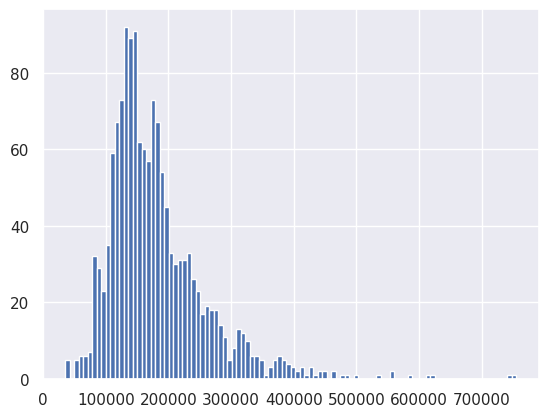

In [121]:
df["SalePrice"].hist(bins=100)
plt.show(block=True)

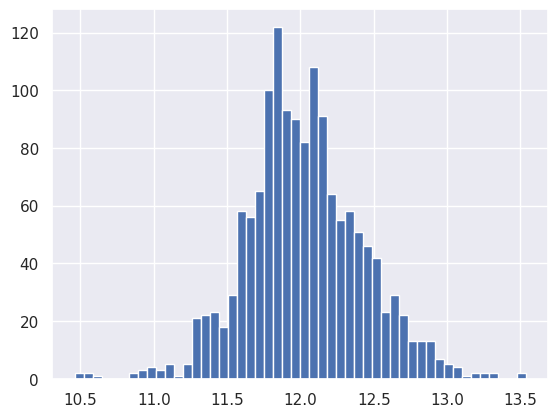

In [122]:
np.log1p(df['SalePrice']).hist(bins=50)
plt.show(block=True)

In [123]:
def quantile_summary(df):
    num_df = df.select_dtypes(include=["int64", "float64"])
    q_df = num_df.quantile([0.01, 0.05, 0.50, 0.95, 0.99]).T
    q_df.columns = ["Q01", "Q05", "Median", "Q95", "Q99"]
    q_df["IQR"] = q_df["Q95"] - q_df["Q05"]
    q_df["Range99"] = q_df["Q99"] - q_df["Q01"]
    return q_df.sort_values("Range99", ascending=False)
quantile_summary(df)

,Q01,Q05,Median,Q95,Q99,IQR,Range99
SalePrice,61815.970,88000.000,163000.000,326100.000,442567.010,238100.000,380751.040
LotArea,1680.000,3182.000,9453.000,17142.900,33038.640,13960.900,31358.640
Id,30.180,146.900,1460.000,2773.100,2889.820,2626.200,2859.640
GrLivArea,675.420,861.000,1444.000,2464.200,2935.720,1603.200,2260.300
TotalBsmtSF,0.000,455.250,989.500,1776.150,2198.300,1320.900,2198.300
BsmtUnfSF,0.000,0.000,467.000,1474.900,1776.490,1474.900,1776.490
1stFlrSF,520.000,665.900,1082.000,1830.100,2288.020,1164.200,1768.020
BsmtFinSF1,0.000,0.000,368.500,1274.000,1635.320,1274.000,1635.320
2ndFlrSF,0.000,0.000,0.000,1131.200,1400.200,1131.200,1400.200
GarageArea,0.000,0.000,480.000,856.150,1019.490,856.150,1019.490


# 🛠️ 10. Feature Engineering

In this section, we will apply several feature engineering steps to enhance the quality and predictive power of the dataset.  
These steps help the model better understand patterns and relationships within the data.

---

## 🧪 10.1 Feature Extraction  
New features will be created from existing variables to strengthen the model’s learning capability.  
This may include transformations, ratios, categorization, or domain-driven feature creation.



---

## 🔍 10.2 Missing Values Detection  
We identify and handle missing values to prevent biases and errors during model training.

---

## 🚨 10.3 Outlier Detection  
Outliers can negatively affect model performance.  
We will detect and treat outliers in numerical variables using appropriate statistical methods.

# 🧪 10.1 Feature Extraction 

In [124]:
# ============================================================
# ===============  FLOOR FEATURES (Kat Alanları) ===============
# ============================================================
df["TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
df["HasSecondFloor"] = (df["2ndFlrSF"] > 0).astype(int)
# ============================================================
# ================= BASEMENT FEATURES (BODRUM) ===============
# ============================================================
df["BsmtFinishedRatio"] = (df["BsmtFinSF1"] + df["BsmtFinSF2"]) / (df["TotalBsmtSF"] + 1)
df["BasementFinished"] = ((df["BsmtFinSF1"] + df["BsmtFinSF2"]) > 0).astype(int)
df["HasBasement"] = (df["TotalBsmtSF"] > 0).astype(int)
# ============================================================
# =================== GARAGE FEATURES (GARAJ) =================
# ============================================================
df["HasGarage"] = (df["GarageArea"] > 0).astype(int)
df["GarageCapacityQuality"] = df["GarageCars"] * df["GarageArea"]
finish_map = {"Fin":3, "RFn":2, "Unf":1, np.nan:0}
df["GarageFinishScore"] = df["GarageFinish"].map(finish_map)
df["GarageFinishArea"] = df["GarageArea"] * df["GarageFinishScore"]
# ============================================================
# =================== PORCH FEATURES (VERANDA) ===============
# ============================================================
df["TotalPorchSF"] = (
    df["OpenPorchSF"] +
    df["EnclosedPorch"] +
    df["3SsnPorch"] +
    df["ScreenPorch"]
)
df["HasPorch"] = (df["TotalPorchSF"] > 0).astype(int)
df["PorchCount"] = (
    (df["OpenPorchSF"] > 0).astype(int) +
    (df["EnclosedPorch"] > 0).astype(int) +
    (df["3SsnPorch"] > 0).astype(int) +
    (df["ScreenPorch"] > 0).astype(int)
)
# ============================================================
# ===================== MISC FEATURES =========================
# ============================================================
df["HasMiscVal"] = (df["MiscVal"] > 0).astype(int)
df["HasPool"] = (df["PoolArea"] > 0).astype(int)
# ============================================================
# =================== AGE & REMODEL FEATURES ==================
# ============================================================
df["RemodelAge"] = df["YearRemodAdd"] - df["YearBuilt"]
df["AgeSinceRemodel"] = df["YrSold"] - df["YearRemodAdd"]
df["AgeSinceBuilt"] = df["YrSold"] - df["YearBuilt"]
# ============================================================
# ================= QUALITY-BASED FEATURES ====================
# ============================================================
df["QualTotalSF"] = df["OverallQual"] * df["TotRmsAbvGrd"]
df["QualLivingRatio"] = df["OverallQual"] / (df["GrLivArea"] + 1)
df["QualMinusCond"] = df["OverallQual"] - df["OverallCond"]


drop_list = ["1stFlrSF" , "2ndFlrSF" , "BsmtFinSF1" , "BsmtFinSF2" , "GarageArea" ,"GarageYrBlt" ,   "GarageCars", "MiscVal" , "MasVnrArea" , "WoodDeckSF" , "OpenPorchSF" , "EnclosedPorch" , "3SsnPorch" ]
df.drop(drop_list, axis=1, inplace=True)

In [125]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFlrSF,HasSecondFloor,BsmtFinishedRatio,BasementFinished,HasBasement,HasGarage,GarageCapacityQuality,GarageFinishScore,GarageFinishArea,TotalPorchSF,HasPorch,PorchCount,HasMiscVal,HasPool,RemodelAge,AgeSinceRemodel,AgeSinceBuilt,QualTotalSF,QualLivingRatio,QualMinusCond
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150.000,856.000,GasA,Ex,Y,SBrkr,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,TA,TA,Y,0,0,NaN,NaN,NaN,2,2008,WD,Normal,208500.000,1710,1,0.824,1,1,1,1096.000,2,1096.000,61,1,1,0,0,0,5,5,56,0.004,2
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284.000,1262.000,GasA,Ex,Y,SBrkr,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,TA,TA,Y,0,0,NaN,NaN,NaN,5,2007,WD,Normal,181500.000,1262,0,0.774,1,1,1,920.000,2,920.000,0,0,0,0,0,0,31,31,36,0.005,-2
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434.000,920.000,GasA,Ex,Y,SBrkr,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,TA,TA,Y,0,0,NaN,NaN,NaN,9,2008,WD,Normal,223500.000,1786,1,0.528,1,1,1,1216.000,2,1216.000,42,1,1,0,0,1,6,7,42,0.004,2
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540.000,756.000,GasA,Gd,Y,SBrkr,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,TA,TA,Y,0,0,NaN,NaN,NaN,2,2006,WD,Abnorml,140000.000,1717,1,0.285,1,1,1,1926.000,1,642.000,307,1,2,0,0,55,36,91,49,0.004,2
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490.000,1145.000,GasA,Ex,Y,SBrkr,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,TA,TA,Y,0,0,NaN,NaN,NaN,12,2008,WD,Normal,250000.000,2198,1,0.572,1,1,1,2508.000,2,1672.000,84,1,1,0,0,0,8,8,72,0.004,3


In [126]:
df["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

# 🔍 10.2 Missing Values Detection  

In [127]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

                       n_miss  ratio
PoolQC                   2909 99.660
MiscFeature              2814 96.400
Alley                    2721 93.220
Fence                    2348 80.440
MasVnrType               1766 60.500
SalePrice                1459 49.980
FireplaceQu              1420 48.650
LotFrontage               486 16.650
GarageFinish              159  5.450
GarageQual                159  5.450
GarageCond                159  5.450
GarageType                157  5.380
BsmtExposure               82  2.810
BsmtCond                   82  2.810
BsmtQual                   81  2.770
BsmtFinType2               80  2.740
BsmtFinType1               79  2.710
MSZoning                    4  0.140
BsmtHalfBath                2  0.070
Functional                  2  0.070
BsmtFullBath                2  0.070
Utilities                   2  0.070
KitchenQual                 1  0.030
Electrical                  1  0.030
TotalBsmtSF                 1  0.030
BsmtUnfSF                   1  0.030
E

In [128]:
no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature" , "MasVnrType"]
for col in no_cols:
    df[col].fillna("No",inplace=True)

missing_values_table(df)

                       n_miss  ratio
SalePrice                1459 49.980
LotFrontage               486 16.650
MSZoning                    4  0.140
Functional                  2  0.070
BsmtHalfBath                2  0.070
BsmtFullBath                2  0.070
Utilities                   2  0.070
TotalBsmtSF                 1  0.030
Electrical                  1  0.030
BsmtUnfSF                   1  0.030
Exterior2nd                 1  0.030
KitchenQual                 1  0.030
Exterior1st                 1  0.030
SaleType                    1  0.030
BsmtFinishedRatio           1  0.030
GarageCapacityQuality       1  0.030
GarageFinishArea            1  0.030


In [129]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  

    
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

df = quick_missing_imp(df, num_method="median", cat_length=17)

# BEFORE
MSZoning                    4
LotFrontage               486
Utilities                   2
Exterior1st                 1
Exterior2nd                 1
BsmtUnfSF                   1
TotalBsmtSF                 1
Electrical                  1
BsmtFullBath                2
BsmtHalfBath                2
KitchenQual                 1
Functional                  2
SaleType                    1
SalePrice                1459
BsmtFinishedRatio           1
GarageCapacityQuality       1
GarageFinishArea            1
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

MSZoning                    0
LotFrontage                 0
Utilities                   0
Exterior1st                 0
Exterior2nd                 0
BsmtUnfSF                   0
TotalBsmtSF                 0
Electrical                  0
BsmtFullBath                0
BsmtHalfBath                0
KitchenQual                 0
Functional    

# 🚨 10.3 Outlier Detection  

Observations: 2919
Variables: 88
cat_cols: 60
num_cols: 27
cat_but_car: 1
num_but_cat: 18
Id : False
MSSubClass : False
LotFrontage : True
LotArea : True
OverallQual : False
YearBuilt : False
YearRemodAdd : False
BsmtUnfSF : False
TotalBsmtSF : True
LowQualFinSF : True
GrLivArea : True
TotRmsAbvGrd : False
ScreenPorch : True
PoolArea : True
MoSold : False
TotalFlrSF : True
BsmtFinishedRatio : False
GarageCapacityQuality : False
GarageFinishArea : False
TotalPorchSF : True
RemodelAge : False
AgeSinceRemodel : False
AgeSinceBuilt : False
QualTotalSF : False
QualLivingRatio : False
QualMinusCond : False


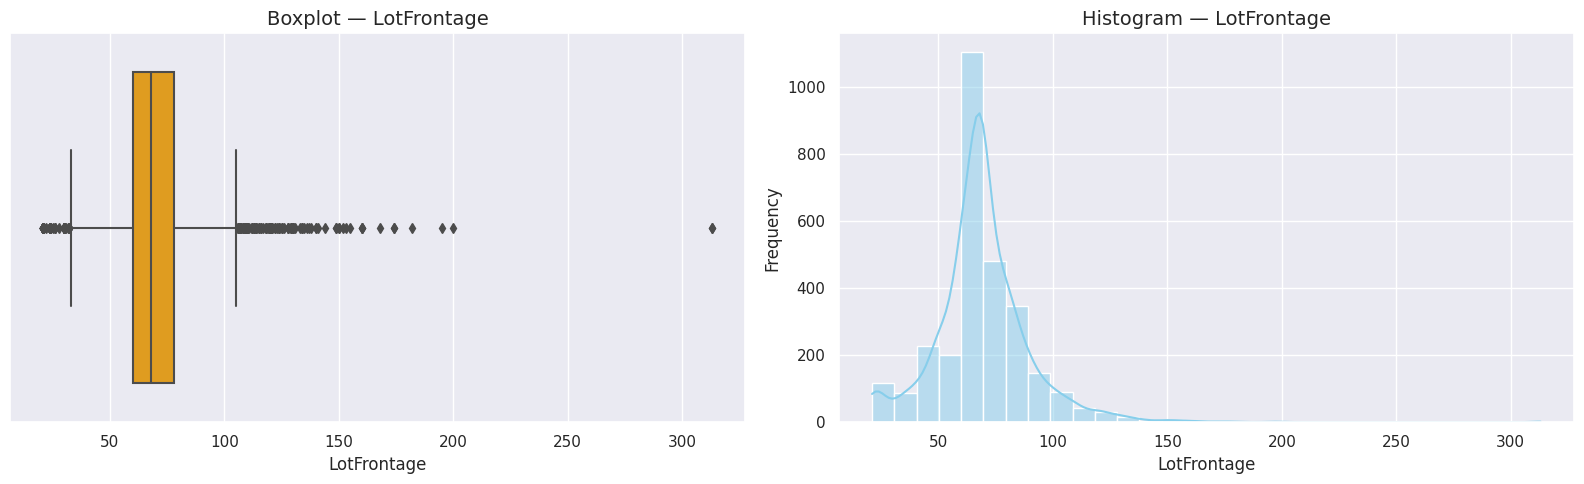

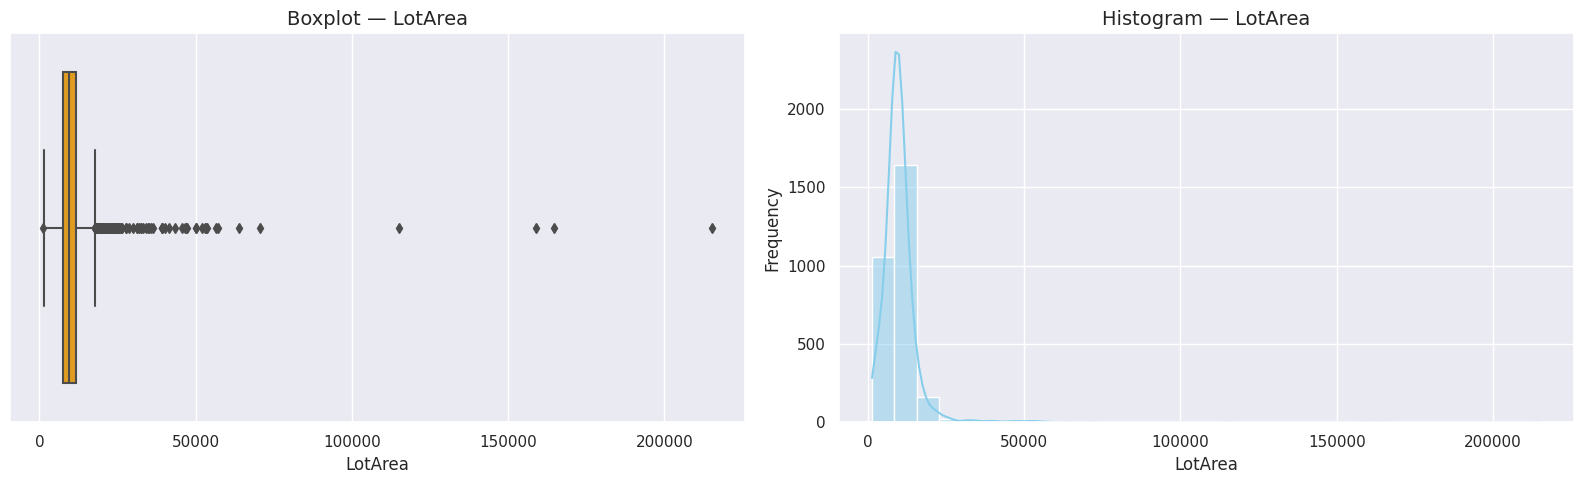

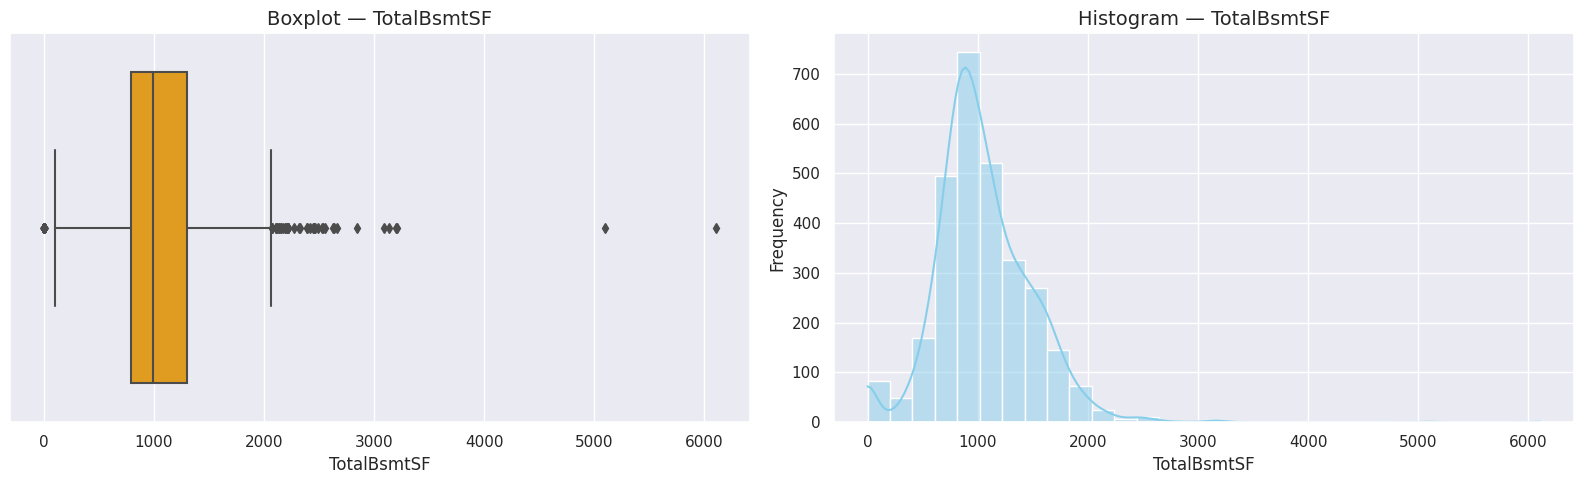

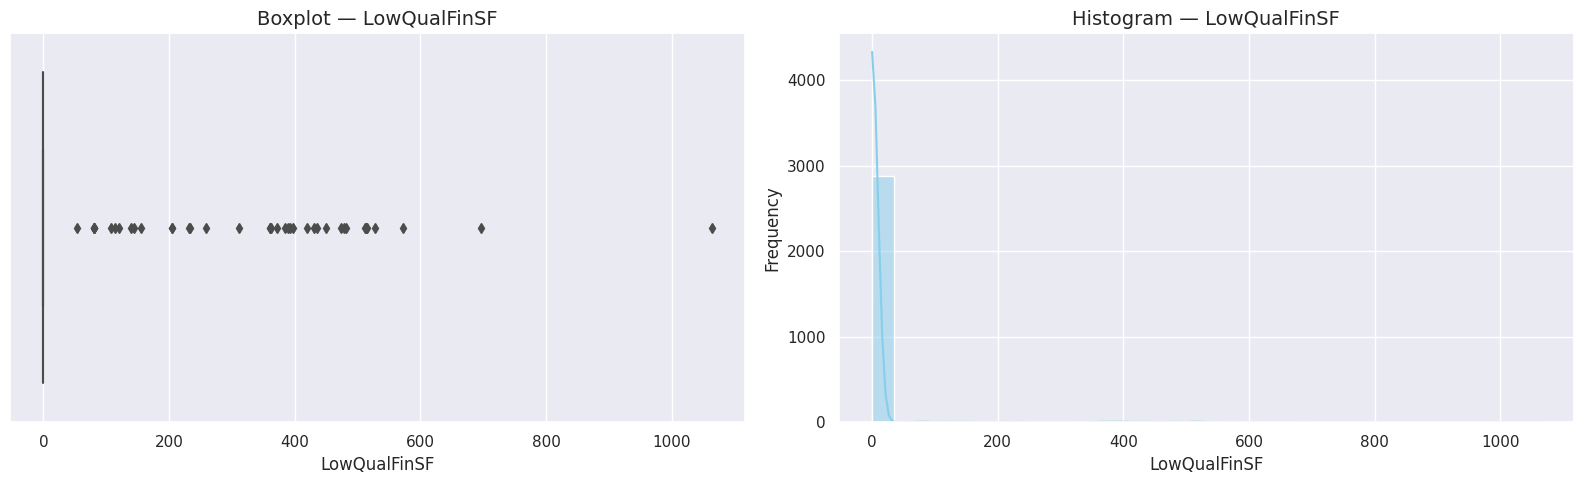

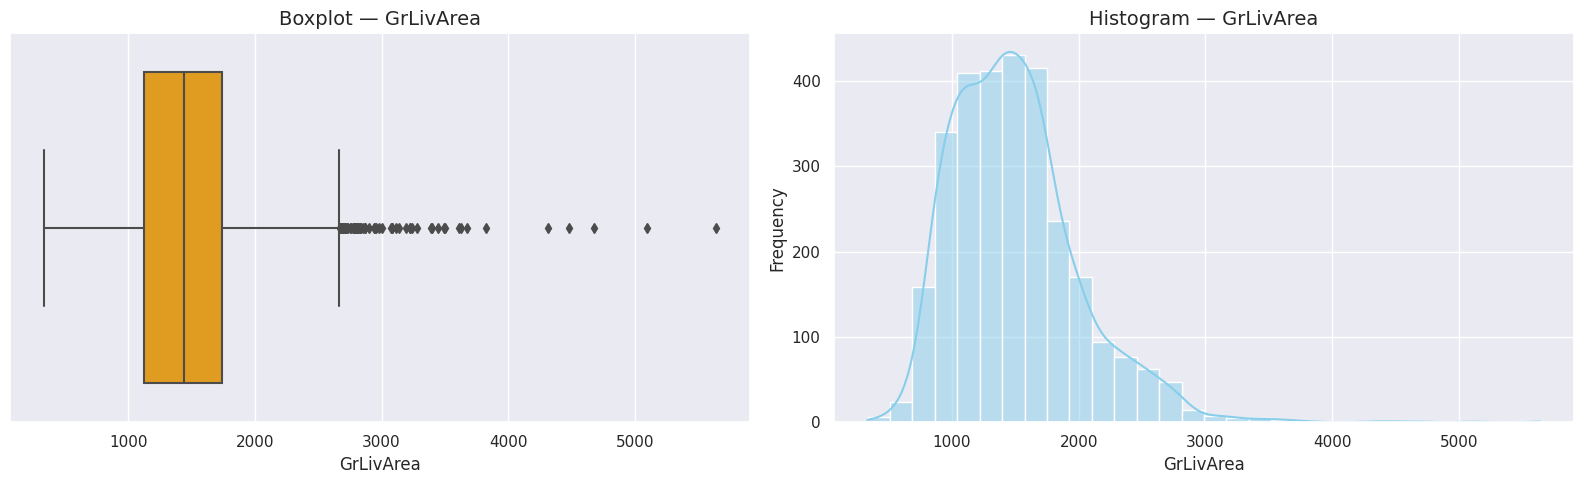

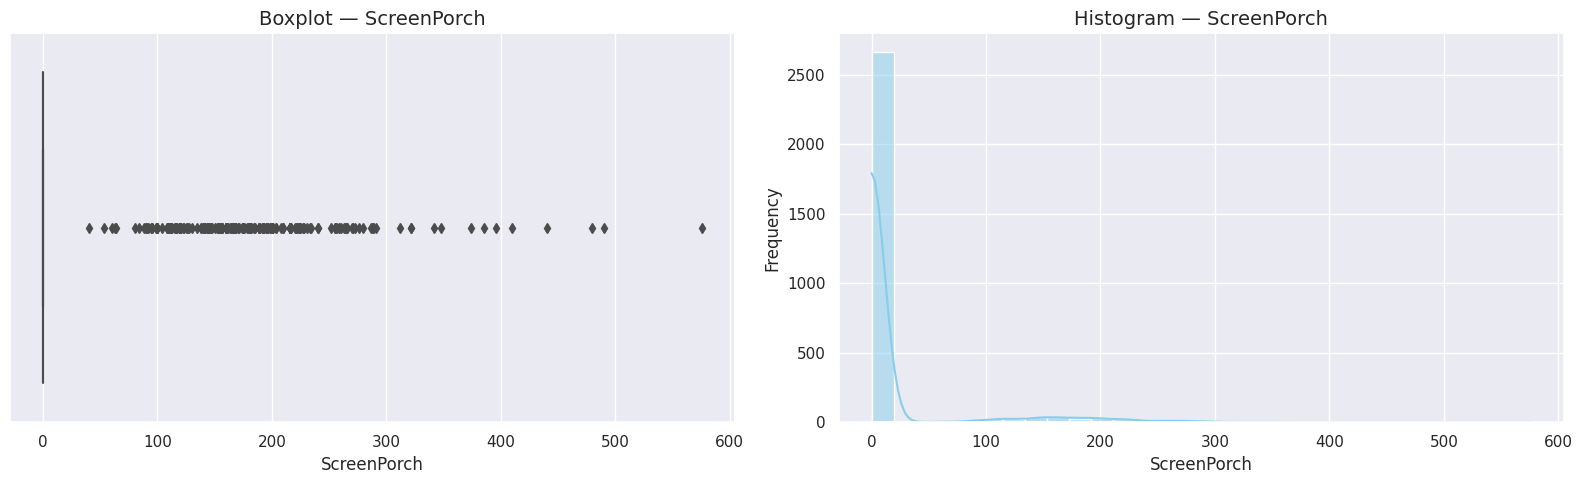

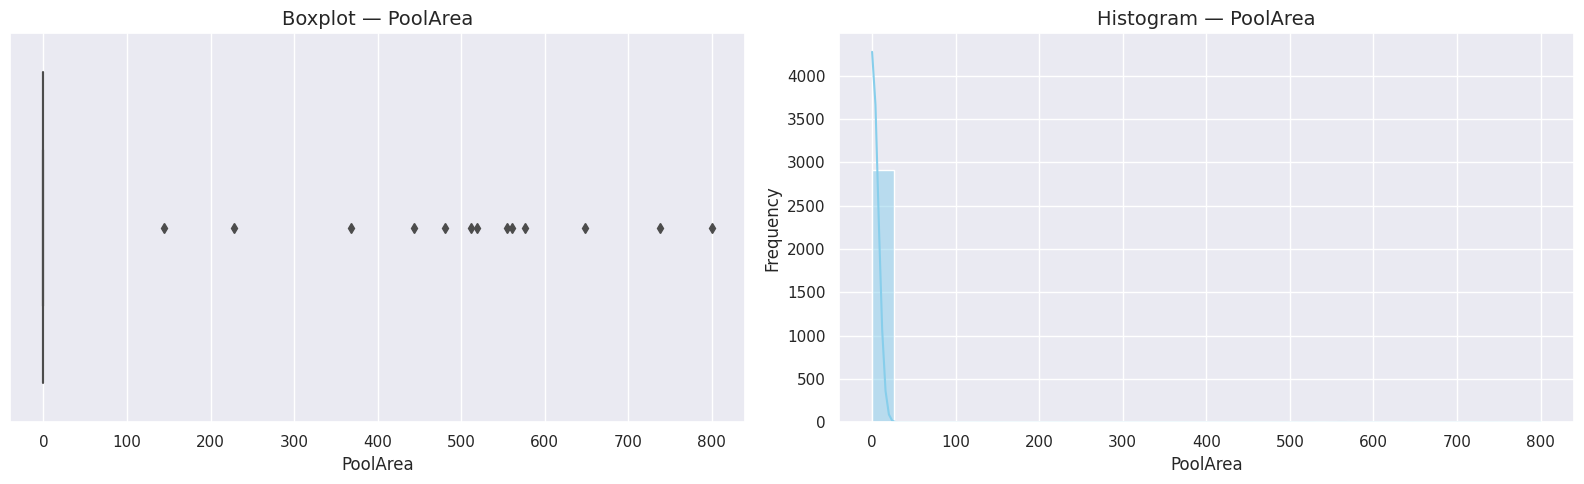

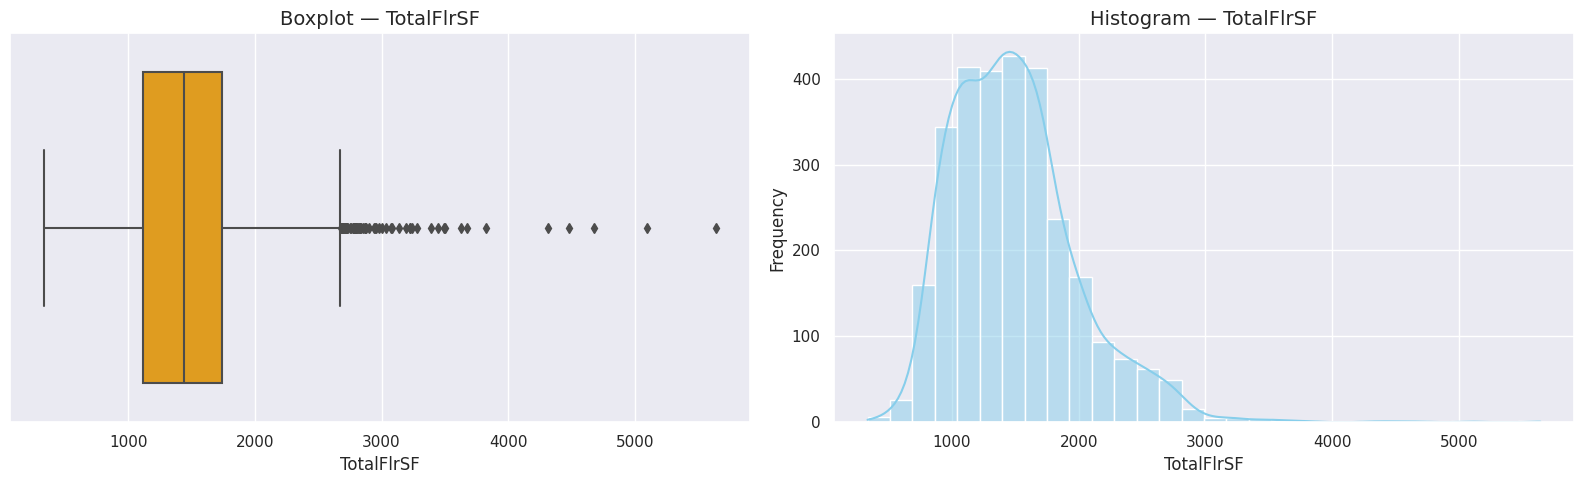

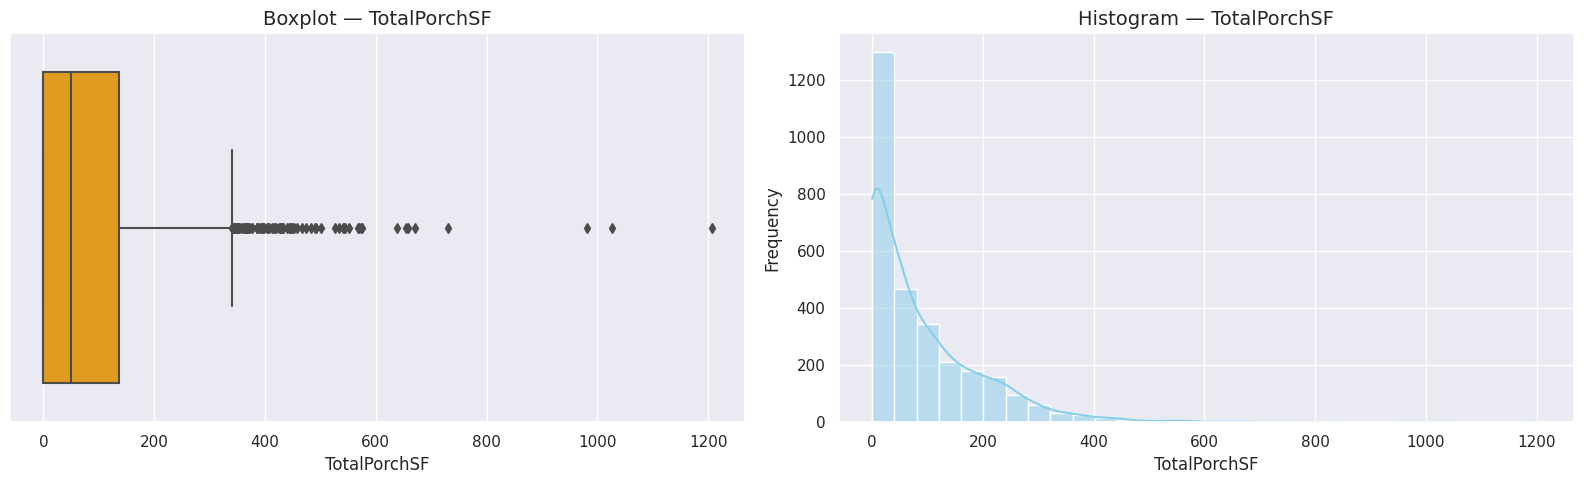

In [130]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)
true_outliers = []
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        true_outliers.append(col)
        return True
    else:
        return False

for col in num_cols:
    if col != "SalePrice":
        print(col, ':', check_outlier(df, col))

def plot_outlier_columns(df, true_cols):
    """
    true_cols içindeki kolonları otomatik olarak
    boxplot + histogram + KDE ile çizer.
    """
    for col in true_cols:
        plt.figure(figsize=(16,5))

        # ---------------------------
        # BOX PLOT
        # ---------------------------
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[col], color="orange")
        plt.title(f"Boxplot — {col}", fontsize=14)
        plt.xlabel(col)

        # ---------------------------
        # HISTOGRAM + KDE
        # ---------------------------
        plt.subplot(1, 2, 2)
        sns.histplot(df[col], kde=True, bins=30, color="skyblue")
        plt.title(f"Histogram — {col}", fontsize=14)
        plt.xlabel(col)
        plt.ylabel("Frequency")

        plt.tight_layout()
        plt.show()

plot_outlier_columns(df ,true_outliers )

In [131]:
winsor_cols = ["LotFrontage", "GrLivArea", "TotalBsmtSF", "TotalFlrSF"]
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

df["LotArea_Log"] = np.log1p(df["LotArea"])

heavy_skew_cols = ["ScreenPorch", "PoolArea", "TotalPorchSF", "LowQualFinSF"]

for col in heavy_skew_cols:
    df[col + "_Binary"] = (df[col] > 0).astype(int)
    df[col + "_Log"] = np.log1p(df[col])




In [132]:
for col in num_cols:
    if col != "SalePrice":
        print(col, ':', check_outlier(df, col))

Id : False
MSSubClass : False
LotFrontage : False
LotArea : False
OverallQual : False
YearBuilt : False
YearRemodAdd : False
BsmtUnfSF : False
TotalBsmtSF : False
LowQualFinSF : False
GrLivArea : False
TotRmsAbvGrd : False
ScreenPorch : False
PoolArea : False
MoSold : False
TotalFlrSF : False
BsmtFinishedRatio : False
GarageCapacityQuality : False
GarageFinishArea : False
TotalPorchSF : False
RemodelAge : False
AgeSinceRemodel : False
AgeSinceBuilt : False
QualTotalSF : False
QualLivingRatio : False
QualMinusCond : False


# 🔤 11. Rare Analysis

In [133]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ':', len(dataframe[col].value_counts()))
        print(pd.DataFrame({'COUNT': dataframe[col].value_counts(),
                            'RATIO': dataframe[col].value_counts() / len(dataframe),
                            'TARGET_MEAN': dataframe.groupby(col)[target].mean()}), end='\n\n\n')

rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
          COUNT  RATIO  TARGET_MEAN
MSZoning                           
C (all)      25  0.009    74528.000
FV          139  0.048   214014.062
RH           26  0.009   131558.375
RL         2269  0.777   190889.009
RM          460  0.158   126316.830


Street : 2
        COUNT  RATIO  TARGET_MEAN
Street                           
Grvl       12  0.004   130190.500
Pave     2907  0.996   181038.723


Alley : 3
       COUNT  RATIO  TARGET_MEAN
Alley                           
Grvl     120  0.041   122219.080
No      2721  0.932   183354.615
Pave      78  0.027   168000.585


LotShape : 4
          COUNT  RATIO  TARGET_MEAN
LotShape                           
IR1         968  0.332   205825.839
IR2          76  0.026   239833.366
IR3          16  0.005   216036.500
Reg        1859  0.637   164754.818


LandContour : 4
             COUNT  RATIO  TARGET_MEAN
LandContour                           
Bnk            117  0.040   143104.079
HLS            120  0.041   231533.940
Low 

In [134]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

rare_encoder(df, 0.01)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFlrSF,HasSecondFloor,BsmtFinishedRatio,BasementFinished,HasBasement,HasGarage,GarageCapacityQuality,GarageFinishScore,GarageFinishArea,TotalPorchSF,HasPorch,PorchCount,HasMiscVal,HasPool,RemodelAge,AgeSinceRemodel,AgeSinceBuilt,QualTotalSF,QualLivingRatio,QualMinusCond,LotArea_Log,ScreenPorch_Binary,ScreenPorch_Log,PoolArea_Binary,PoolArea_Log,TotalPorchSF_Binary,TotalPorchSF_Log,LowQualFinSF_Binary,LowQualFinSF_Log
0,1.000,60,RL,65.000,8450.000,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150.000,856.000,GasA,Ex,Y,SBrkr,0,1710.000,1.000,0.000,2,1,3,1,Gd,8.000,Typ,0,No,Attchd,RFn,TA,TA,Y,0.000,0,No,No,No,2.000,2008,WD,Normal,208500.000,1710.000,1,0.824,1,1,1,1096.000,2,1096.000,61.000,1,1,0,0,0,5,5.000,56,0.004,2.000,9.042,0,0.000,0,0.000,1,4.127,0,0.000
1,2.000,20,RL,80.000,9600.000,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,6,8,1976,1976.000,Gable,CompShg,MetalSd,MetalSd,No,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284.000,1262.000,GasA,Ex,Y,SBrkr,0,1262.000,0.000,1.000,2,0,3,1,TA,6.000,Typ,1,TA,Attchd,RFn,TA,TA,Y,0.000,0,No,No,No,5.000,2007,WD,Normal,181500.000,1262.000,0,0.774,1,1,1,920.000,2,920.000,0.000,0,0,0,0,0,31,31.000,36,0.005,-2.000,9.170,0,0.000,0,0.000,0,0.000,0,0.000
2,3.000,60,RL,68.000,11250.000,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434.000,920.000,GasA,Ex,Y,SBrkr,0,1786.000,1.000,0.000,2,1,3,1,Gd,6.000,Typ,1,TA,Attchd,RFn,TA,TA,Y,0.000,0,No,No,No,9.000,2008,WD,Normal,223500.000,1786.000,1,0.528,1,1,1,1216.000,2,1216.000,42.000,1,1,0,0,1,6,7.000,42,0.004,2.000,9.328,0,0.000,0,0.000,1,3.761,0,0.000
3,4.000,70,RL,60.000,9550.000,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970.000,Gable,CompShg,Wd Sdng,Wd Shng,No,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540.000,756.000,GasA,Gd,Y,SBrkr,0,1717.000,1.000,0.000,1,0,3,1,Gd,7.000,Typ,1,Gd,Detchd,Unf,TA,TA,Y,0.000,0,No,No,No,2.000,2006,WD,Abnorml,140000.000,1717.000,1,0.285,1,1,1,1926.000,1,642.000,307.000,1,2,0,0,55,36,91.000,49,0.004,2.000,9.164,0,0.000,0,0.000,1,5.730,0,0.000
4,5.000,60,RL,84.000,14260.000,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000.000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490.000,1145.000,GasA,Ex,Y,SBrkr,0,2198.000,1.000,0.000,2,1,4,1,Gd,9.000,Typ,1,TA,Attchd,RFn,TA,TA,Y,0.000,0,No,No,No,12.000,2008,WD,Normal,250000.000,2198.000,1,0.572,1,1,1,2508.000,2,1672.000,84.000,1,1,0,0,0,8,8.000,72,0.004,3.000,9.565,0,0.000,0,0.000,1,4.443,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915.000,160,RM,21.000,1936.000,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970.000,Gable,CompShg,CemntBd,CmentBd,No,TA,TA,CBlock,TA,TA,No,Unf,Unf,546.000,546.000,GasA,Gd,Y,SBrkr,0,1092.000,0.0

In [135]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 2919
Variables: 97
cat_cols: 68
num_cols: 28
cat_but_car: 1
num_but_cat: 26


# 🔤 12. Encoding

In [136]:
def binary_cols(dataframe):
    binary_cols = [col for col in dataframe.columns if dataframe[col].dtype not in ['int64', 'float64'] and dataframe[col].nunique() <= 2]
    return binary_cols

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = binary_cols(df)



In [137]:
for col in binary_cols:
    df = label_encoder(df, col)

In [138]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()


,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,ScreenPorch,MoSold,SalePrice,TotalFlrSF,BsmtFinishedRatio,GarageCapacityQuality,GarageFinishArea,TotalPorchSF,RemodelAge,AgeSinceRemodel,AgeSinceBuilt,QualTotalSF,QualLivingRatio,QualMinusCond,LotArea_Log,ScreenPorch_Log,TotalPorchSF_Log,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_1,Alley_No,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_1,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_1,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,Ha

In [139]:
df.columns = df.columns.str.replace(" ", "_")


In [140]:
df.drop("Neighborhood", axis=1, inplace=True)


# 🤖 13. Modeling

In [141]:
train_df = df[df['SalePrice'].notnull()].copy()
test_df  = df[df['SalePrice'].isnull()].copy()

train_df["SalePrice_Log"] = np.log1p(train_df["SalePrice"])


y = train_df["SalePrice_Log"]
X = train_df.drop(["Id", "SalePrice", "SalePrice_Log"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)


In [ ]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
execution_times = []

for name, regressor in models:
    start_time = time.time()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate RMSE
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")

# Plot RMSE scores
plt.figure(figsize=(12, 8))
# Exclude LR from the plot
filtered_scores = [score for name, score in zip([name for name, _ in models], rmse_scores) if name != 'LR']
plt.bar([name for name, _ in models if name != 'LR'], filtered_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.show()

# Plot execution times
plt.figure(figsize=(12, 8))
plt.bar([name for name, _ in models], execution_times)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Model")
plt.title("Execution Times for Different Models")
plt.show()

RMSE: 0.1748 (LR)
Execution Time: 0.39 seconds

RMSE: 0.1463 (Ridge)
Execution Time: 0.2 seconds

RMSE: 0.1887 (Lasso)
Execution Time: 0.55 seconds

RMSE: 0.1802 (ElasticNet)
Execution Time: 0.59 seconds

RMSE: 0.2095 (KNN)
Execution Time: 0.12 seconds

RMSE: 0.2079 (CART)
Execution Time: 0.33 seconds

RMSE: 0.1461 (RF)
Execution Time: 18.64 seconds

RMSE: 0.1313 (GBM)
Execution Time: 6.63 seconds

RMSE: 0.1468 (XGBoost)
Execution Time: 3.21 seconds

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3954
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 176
[LightGBM] [Info] Start training from score 12.026942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_row_wise=true` 

In [ ]:
y_pred_test = regressor.predict(X_test)

# Log’dan geri dönüşüm
y_pred_test_original_scale = np.expm1(y_pred_test)
y_test_original_scale = np.expm1(y_test)

# RMSE hesapla
rmse_original_scale = np.sqrt(np.mean((y_pred_test_original_scale - y_test_original_scale) ** 2))

print(f"RMSE in original scale: {round(rmse_original_scale, 4)}")

In [ ]:

train_df = df[df['SalePrice'].notnull()].copy()
test_df  = df[df['SalePrice'].isnull()].copy()

y = np.log1p(train_df['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=17
)



models = [
    ("GBM", GradientBoostingRegressor()),
    ("XGBoost", XGBRegressor(objective='reg:squarederror')),
    ("LightGBM", LGBMRegressor()),
    ("CatBoost", CatBoostRegressor(verbose=False))
]

param_grids = {
    "GBM": {"n_estimators": [100, 200], "max_depth": [5, 7], "learning_rate": [0.01, 0.1]},
    "XGBoost": {"n_estimators": [100, 200], "max_depth": [5, 7], "learning_rate": [0.01, 0.1]},
    "LightGBM": {"n_estimators": [100, 200], "max_depth": [5, 7], "learning_rate": [0.01, 0.1]},
    "CatBoost": {"iterations": [100, 200], "depth": [5, 7], "learning_rate": [0.01, 0.1]}
}

rmse_values = []
execution_times = []
model_names = []



for name, regressor in models:
    print(f"Hyperparameter Tuning for {name}:")

    start_time = time.time()
    grid_search = GridSearchCV(
        regressor, 
        param_grid=param_grids[name], 
        cv=5, 
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    execution_time = end_time - start_time
    best_model = grid_search.best_estimator_

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Execution Time: {execution_time:.4f} seconds")

    # RMSE in original scale
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

    print(f"RMSE: {rmse:.4f}")
    print("---------------")

    rmse_values.append(rmse)
    execution_times.append(execution_time)
    model_names.append(name)


plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='steelblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Top 4 Model Performance (RMSE)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(model_names, execution_times, color='darkorange')
plt.xlabel('Model')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Times – Top 4 Models')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Final Prediction Model
final_model = best_model

# Make predictions on the test set using the final model
y_final_pred = final_model.predict(X_test)
final_y_pred = np.expm1(y_final_pred)
final_y_test = np.expm1(y_test)

In [ ]:
# Create a DataFrame with the predicted prices and true prices
results = pd.DataFrame({'Predicted Price': final_y_pred, 'True Price': final_y_test})

# Calculate the difference between the true prices and predicted prices and add a new column
results['Difference'] = results['True Price'] - results['Predicted Price']

# Display the results
print(results)

In [ ]:
from sklearn.metrics import r2_score

r2_original = r2_score(final_y_test, final_y_pred)
print("R2 Score (Original Scale):", round(r2_original, 4))

In [ ]:
# Create a DataFrame with the predicted prices and true prices
results = pd.DataFrame({'Predicted Price': final_y_pred, 'True Price': final_y_test})

# Create a line plot
sns.lineplot(data=results)

# Label the axes
plt.xlabel('Sample')
plt.ylabel('Price')

# Set the title
plt.title('Predicted Prices vs. True Prices')

# Show the plot
plt.show()

In [ ]:
def plot_importance(model, features, num=50, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

plot_importance(final_model, X)

In [ ]:
final_y_pred = np.expm1(y_final_pred)
final_y_test = np.expm1(y_test)

# Kaggle Metric: RMSE(log(pred), log(actual))
kaggle_rmse = np.sqrt(mean_squared_error(
    np.log1p(final_y_test), 
    np.log1p(final_y_pred)
))

print("Kaggle Metric RMSE (log scale):", round(kaggle_rmse, 5))